# Assignment 2
## 2291588

## Question No. 1: (Data Analysis) [20 Marks]



### Load the training and test data files and answer the following questions:

In [1]:
# import some libraries for question 1 
import csv
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Mar 30 07:35:46 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    44W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read images
X_image= np.load("/content/drive/MyDrive/desk2/images.npy") #read images
Y_counts= pd.read_csv('/content/drive/MyDrive/desk2/counts.csv') # read counts

Z_splits =np.loadtxt('/content/drive/MyDrive/desk2/split.txt')#read fold information
Y_counts['total'] = Y_counts.iloc[:,0:6].sum(axis=1)

In [5]:

# read images for local file
X_image = np.load("images.npy")#read images
Y_counts = pd.read_csv('counts.csv')#read cell counts 

Z_splits = np.loadtxt('split.txt')#read fold information

FileNotFoundError: ignored

In [6]:
# add new total count to Y_counts, use 0,6 instead of sum all , or this
# will include total to the sum when run this block again
Y_counts['total'] = Y_counts.iloc[:,0:6].sum(axis=1)

In [7]:
# check the number of examples in each data set

print("The number of  sample is: ", len(X_image))


The number of  sample is:  4981


### i.How many examples are there in each fold? [2 marks]

In [8]:

# get fold 1
index_1 = [i for i, x in enumerate(Z_splits) if x == 1]
fold_X1 = [X_image[i] for i in index_1]
fold_Y1= Y_counts.loc[index_1]
fold_Z1=[Z_splits[i] for i in index_1] #
# print(sum(fold_Z1),len(fold_X1),len(fold_Y1))
# get fold 2
index_2 = [i for i, x in enumerate(Z_splits) if x == 2]
fold_X2 = [X_image[i] for i in index_2]
fold_Y2= Y_counts.loc[index_2]
fold_Z2=[Z_splits[i] for i in index_2]
# print(sum(fold_Z2),len(fold_X2),len(fold_Y2))


# get fold 3
index_3 = [i for i, x in enumerate(Z_splits) if x == 3]
fold_X3 =[X_image[i] for i in index_3]
fold_Y3= Y_counts.loc[index_3]
fold_Z3=[Z_splits[i] for i in index_3]
# print(sum(fold_Z3),len(fold_X3),len(fold_Y3))
print('The number of examples in fold 1 is:',len(fold_X1))
print('The number of examples in fold 2 is:',len(fold_X2))
print('The number of examples in fold 3 is:',len(fold_X3))
# 

The number of examples in fold 1 is: 1622
The number of examples in fold 2 is: 1751
The number of examples in fold 3 is: 1608


### ii. Show some image examples using plt.imshow. Describe your observations on what you see in the images and how it correlates with the cell counts of different types of cells and the overall number of cells. [2 marks]


In [9]:
Y_counts.iloc[1996] # we can see the number of total is correct.

neutrophil     0
epithelial    39
lymphocyte     2
plasma         0
eosinophil     0
connective     5
total         46
Name: 1996, dtype: int64

Test object
      neutrophil  epithelial  lymphocyte  plasma  eosinophil  connective  \
25             0           0          10       2           3          29   
2474           1           0         109      11           7          54   
2538           2          43          10       1           0          10   
4840           1          83          23      16           0          13   
2736           0         102          11      10           0          16   
231            0          30           0       0           0           5   
2481           1           0          88       8           6          50   
987            0          54          22      21           0          27   
937            0           0          12       0           1          58   
4976           0          22          17       8           2          50   

      total  
25       44  
2474    182  
2538     66  
4840    136  
2736    139  
231      35  
2481    153  
987     124  
937      71  
4976     99

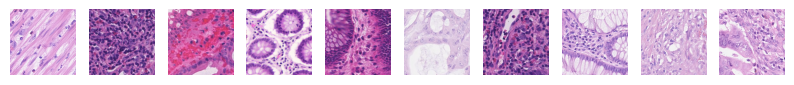

In [10]:
# Get 10 samples and the counts
# pick random index and then use the index to pick samples in image and count data.
def sub_sample(dataset,dataset2, n):
    set_n = len(dataset)
    sub_index = random.sample(range(1, set_n), n)
    sub_data =np.array(dataset)[sub_index]
    sub_data2=dataset2.iloc[sub_index]
    
    return sub_data,sub_data2



#get 10 random object from Xtest set

random_image,random_count=sub_sample(X_image,Y_counts,10)


#Show test examples
print("Test object")
print(random_count)
fig,ax=plt.subplots(1,10,figsize=(10,1))
for i in range(10):
    ax[i].imshow(random_image[i].reshape((256,256,3)))
    ax[i].axis("off")
plt.show()


#### Answer 
Pictures with High total number of cells includes more detail,without bological knowldge, I can not find the relationship between image and number of cells. I don't know how to link the count and image these 6 types of cells by raw eyes, but we can see that the graphs have different color; different white area and different texture. So RGB average and texture features could be useful for predict counts. Also, some of the cell types looks similar with each other, they could share similar feature and hard to be distinguished.

### iii. For each fold, plot the histogram of counts of each cell type separately as well as the total number of cells (7 plots in total). How many images have counts within each of the following bins? [4 marks]

In [11]:



# Plot the histograms of counts of each type separately
def histo_plot(histo_Y):
    fig,ax=plt.subplots(1,7,figsize=(14,2))
    cell_count_histo=-1
    for col in histo_Y.columns:
        count1+=1
        # put the given bins
        ax[cell_count_histo].hist(histo_Y[col], bins=[0, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')], alpha=0.5)
        ax[cell_count_histo].set_title(count)

    plt.show()  


    # Count the number of instances that fall within each bin
    bins = [0, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,float('inf')]
    for col in histo_Y.columns:
        hist, _ = np.histogram(histo_Y[col], bins=bins)
        print(f"{col}:")
        for i in range(len(bins)-1):
            print(f"   {bins[i]}-{bins[i+1]-1}: {hist[i]}")
        print(f"   >{bins[-2]}: {hist[-1]}")





In [12]:
# Plot the histograms of counts of each type separately
def histo_plot2(histo_Y):
    
    fig,ax=plt.subplots(1,7,figsize=(14,2))
    count1=-1
    for col in histo_Y.columns:
        count1+=1
        ax[count1].hist(histo_Y[col], bins=[0, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')], alpha=0.5)
        ax[count1].set_title(col)

    plt.show()  


    # Count the number of instances that fall within each bin
    bins = [0, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,float('inf')]
    row_l=[]
    row_color_l=[]
    col_l=[]
    data_l=[]
    col_color_l = ["#377eb8" for _ in range(13)]
    for i in range(len(bins)-1):
            col_l.append(f"   {bins[i]}-{bins[i+1]-1}")
            
    for col in histo_Y.columns:
        hist, _ = np.histogram(histo_Y[col], bins=bins)
        row_l.append((f"{col}"))
        row_color_l.append("#F0C9C0")
        data_l.append(hist)
    col_l[-1]='>=100'
    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')
    result_table = ax.table(cellText=data_l,rowLabels=row_l,colLabels=col_l,cellLoc = 'center',
                            rowColours=row_color_l,colColours=col_color_l,
                         loc='center')
#, colColours=colColours, rowColours=rowColours,
    result_table.scale(2,6)
    plt.show()  
        

This is the histogram and count table for fold 1


/usr/local/lib/python3.9/dist-packages/matplotlib/axes/_axes.py:6826: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


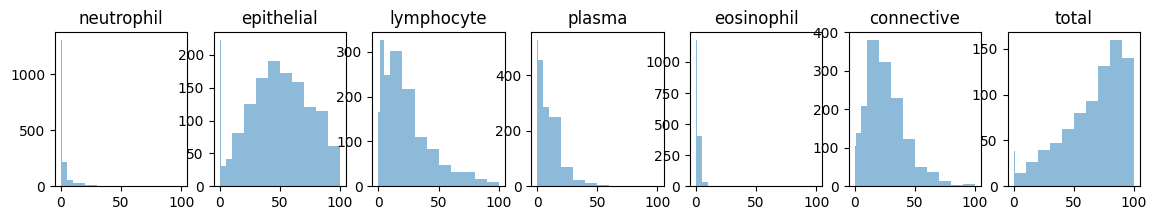

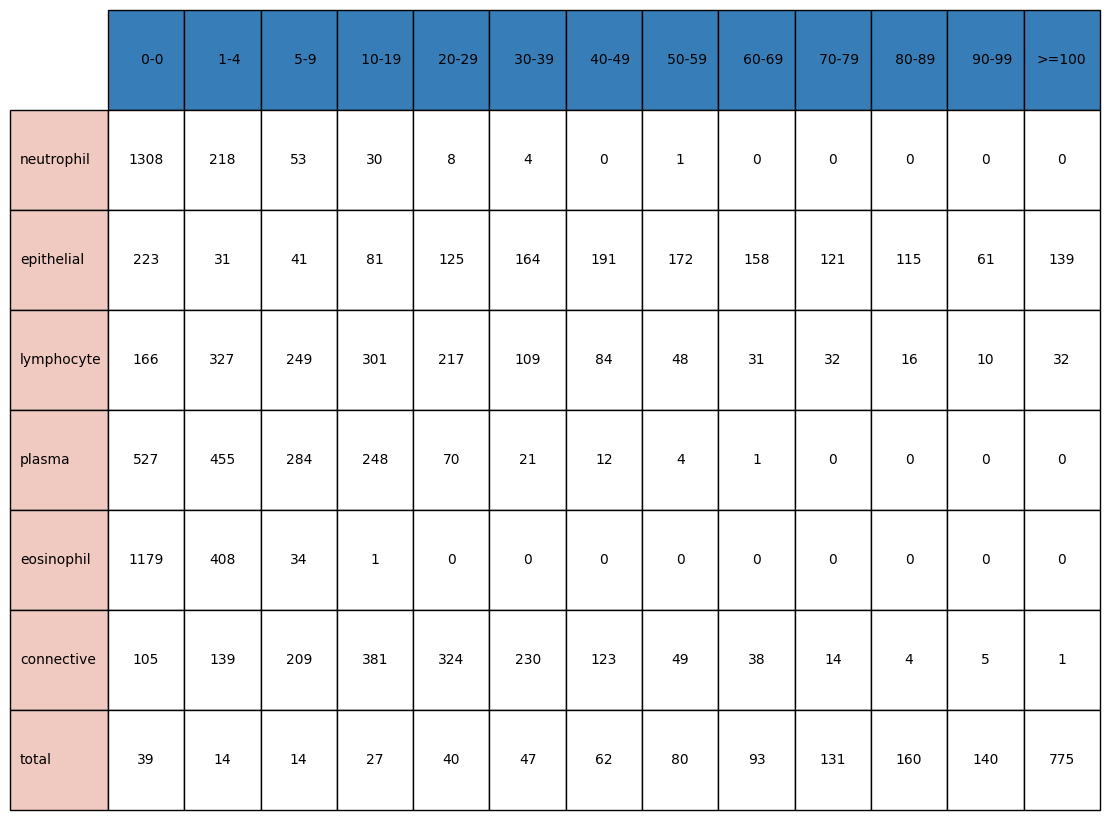

In [13]:
print('This is the histogram and count table for fold 1')
histo_plot2(fold_Y1)


This is the histogram and count table for fold 2


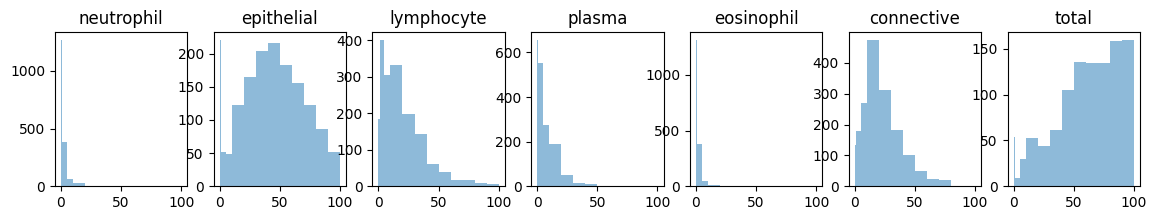

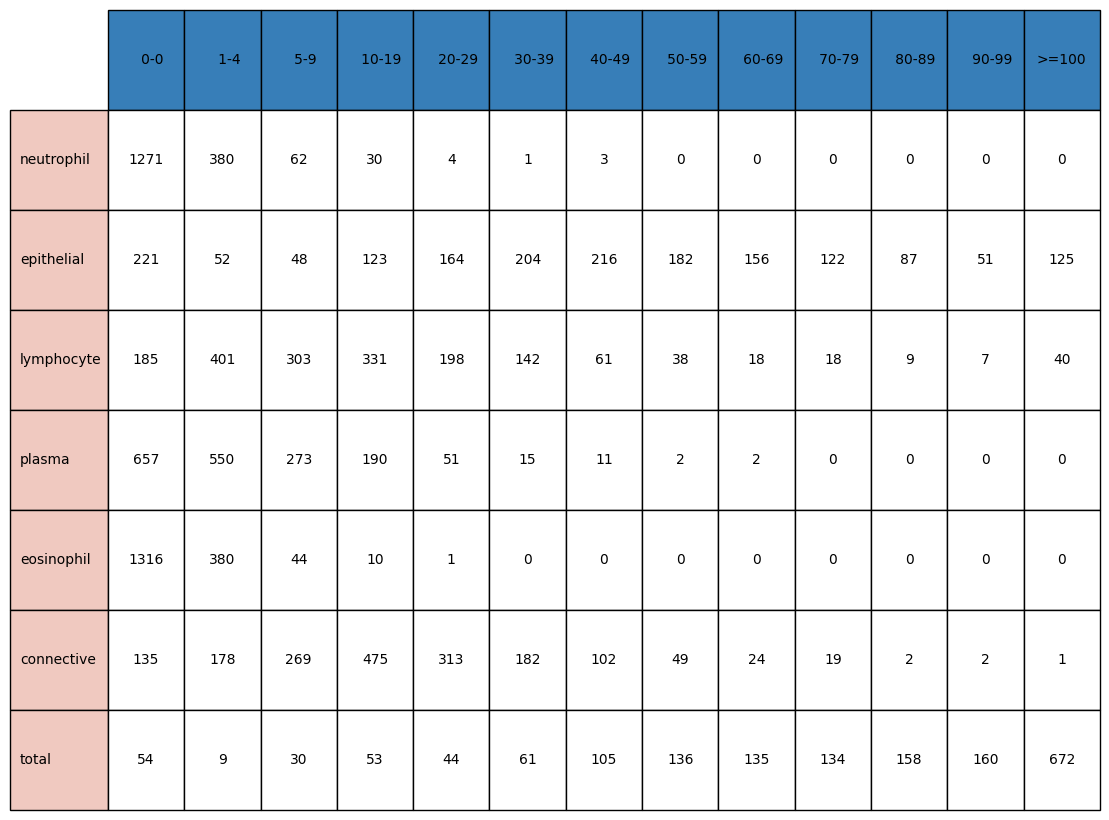

In [14]:
print('This is the histogram and count table for fold 2')
histo_plot2(fold_Y2)

This is the histogram and count table for fold 3


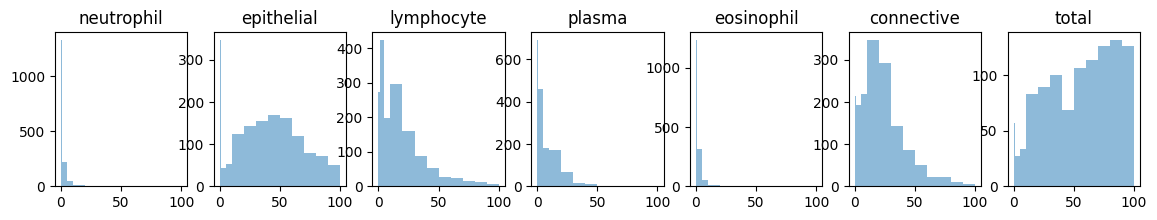

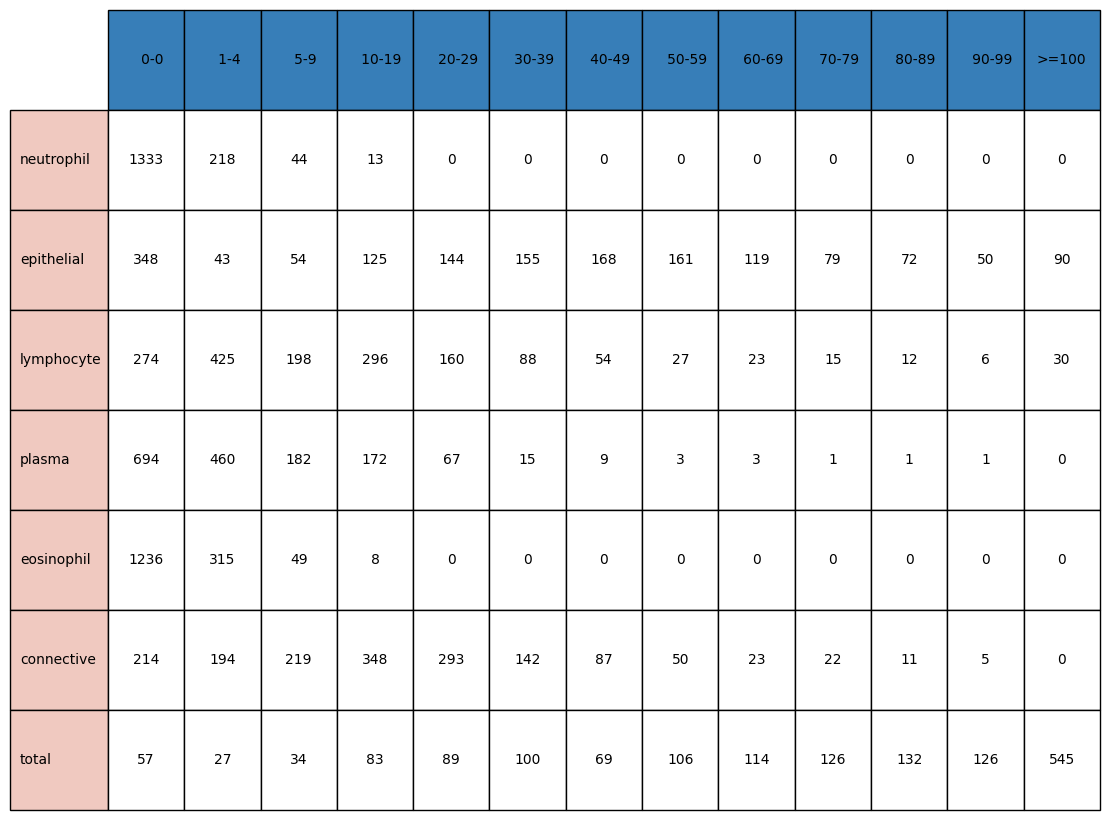

In [15]:
print('This is the histogram and count table for fold 3')
histo_plot2(fold_Y3)

### iv.Pre-processing: Convert and show a few images from RGB space to HED space and show the H-channel which should indicate cellular nuclei. For this purpose, you can use the color separation notebook available here: https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_ihc_color_separation.html [5 marks]

In [16]:

import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hed, hed2rgb


In [17]:

# Display to simplfy the 
def show_hed(image1):
    ihc_hed = rgb2hed(image1)

    # Create an RGB image for each of the stains
    null = np.zeros_like(ihc_hed[:, :, 0])
    ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
    ihc_e = hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1))
    ihc_d = hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1))
    fig, axes = plt.subplots(1, 4, figsize=(7, 6), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(image1)
    ax[0].set_title("Original image")

    ax[1].imshow(ihc_h)
    ax[1].set_title("Hematoxylin")

    ax[2].imshow(ihc_e)
    ax[2].set_title("Eosin")  # Note that there is no Eosin stain in this image

    ax[3].imshow(ihc_d)
    ax[3].set_title("DAB")

    for a in ax.ravel():
        a.axis('off')

    fig.tight_layout()

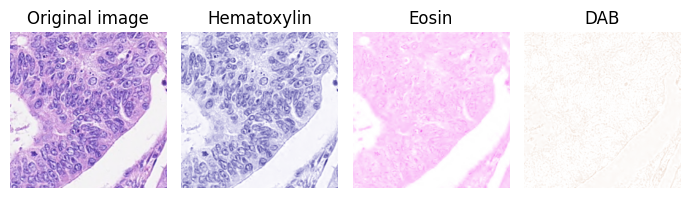

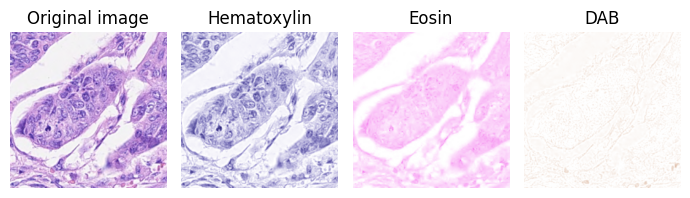

In [18]:


show_hed(X_image[2])
show_hed(X_image[3])

### v. Do a scatter plot of the average of the H-channel for each image vs. its cell count of a certain type and the total number of cells for images in Fold-1 (7 plots in total). Do you think this feature would be useful in your regression model? Explain your reasoning. [4 marks]

In [19]:
hed_f1=[]
mh_f1=[]
for i in range(0,len(fold_X1)):
    hed_f1.append(rgb2hed(fold_X1[i]))

    # Create an RGB image for each of the stains
    null = np.zeros_like(hed_f1[i][:, :, 0])
    h_f1 = hed2rgb(np.stack((hed_f1[i][:, :, 0], null, null), axis=-1))
    mh_f1.append(rgb2hed(fold_X1[i]).mean())



In [21]:
type(fold_Y1['total'])

pandas.core.series.Series

In [20]:
hed_f1[1].mean()

0.012776306629159235

In [22]:


# Define two lists
x=mh_f1
y = fold_Y1['total']

import matplotlib.pyplot as plt


def scatter_parameter_count(feature_list,Y_list):

    fig,ax=plt.subplots(1,7,figsize=(14,2))
    count_scatter=-1
    colors = ['#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#e41a1c', '#a65628', '#f781bf']
    for col in Y_list.columns:
        count_scatter+=1
        ax[count_scatter].scatter(Y_list[col],feature_list, alpha=0.5,color=colors[count_scatter])
        ax[count_scatter].set_title(f"{col}")
        ax[count_scatter].set_xlabel("Cell_count")
        if count_scatter==0:
            ax[count_scatter].set_ylabel("H-channel")

    plt.show() 

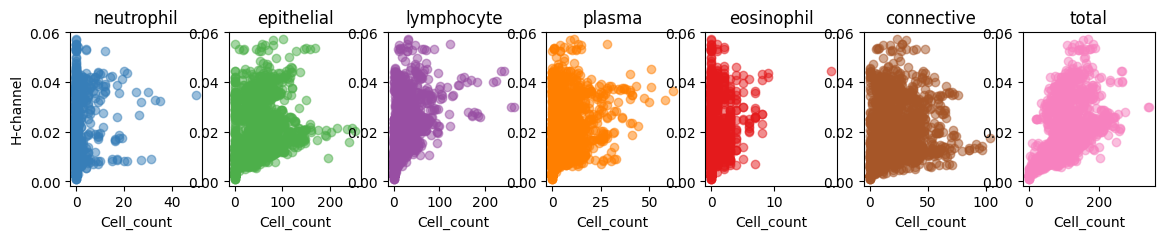

In [23]:
scatter_parameter_count(mh_f1,fold_Y1)

 #### Answer
 It could be useful because we can see high H channel means higher total cell counts


### vi. What performance metrics can you use for this problem? Which one will be the best performance metric for this problem? Please give your reasoning. [3 marks]

#### Answer
1 Mean absolute Error (MAE)
2 Mean Squared Error(MSE)
3 Root Mean Squared Error (RMSE)
4 R-squared (R2)
5 Mean Absolute Percentage Error (MAPE)
6 Adjusted R-squared
The best performance metric for deciding features is sdjusted r2 and the best for compare model is RMSE
If Iwant to find parameters the Best is adjusted  R2 : i think adjusted r2 is the best one as it clearly shows the performance of model. The task is to compare and find the best model Closer to 1 means better performance, so it's easier to compare model. In later task we also have to compare the model's performance predicting different cell type. So R2 could be better as we can see the varaince explained.  we can know the model has better performance predicting one cell type but worse predicting another one.
also, it considers the number of features, in this task we have to consider which feature to put in the model,It can also help to pick features, we can observe the change of r2 after ading/removing some features.So I think this is the best performance matrix for this task.

For compare models RMSE is the best one. MAE is less sensitive to the outliers, and RMSE/MSE are more sensitive to outliers. I think RMSE is better because the loss has the same unit as the data. the smaller RMSE means better accuracy.

# Question No. 2: (Feature Extraction and Classical Regression) [40 Marks]

### a. average of the “H”, red, green and blue channels 

In [24]:
# load library for question 2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2hed, hed2rgb

In [25]:
# create functions to get features
def get_h(image2):
    hed_2 = rgb2hed(image2)
    # Create an RGB image for each of the stains
    null = np.zeros_like(hed_2[:, :, 0])
    ihc_h = hed2rgb(np.stack((hed_2[:, :, 0], null, null), axis=-1))
    h_m=ihc_h.mean()
    h_v=ihc_h.var()
    return h_m, h_v
    
def get_mean(image2):
    h_mean=get_h(image2)[0]
    
    red_mean =np.mean( image2[:,:,0])
    green_mean = np.mean(image2[:,:,1])
    blue_mean = np.mean(image2[:,:,2])
    return h_mean,red_mean,green_mean,blue_mean
def get_variance(image2):
    h_var=get_h(image2)[1]
    red_var =np.var(image2[:,:,0])
    green_var = np.var(image2[:,:,1])
    blue_var = np.var(image2[:,:,2])  
    return h_var,red_var,green_var,blue_var
# example features
get_mean(X_image[1])

(0.8353007524220143,
 202.47341918945312,
 176.37388610839844,
 222.85787963867188)

b. variance of the “H”, red, green and blue channels 


In [26]:
# create a function to get features
def get_variance(image2):
    h_var=get_h(image2)[1]
    red_var =np.var(image2[:,:,0])
    green_var = np.var(image2[:,:,1])
    blue_var = np.var(image2[:,:,2])  
    return h_var,red_var,green_var,blue_var
# example features
get_variance(X_image[1])

(0.01934545196353478, 1417.46007837262, 2178.9753672590014, 509.6814009239897)

In [27]:
# get all features for X_image
h_mean_list=[]
red_mean_list=[]
green_mean_list=[]
blue_mean_list=[]
h_var_list=[]
red_var_list=[]
green_var_list=[]
blue_var_list=[]

for i in range(0,len(X_image)):
    h_mean,red_mean,green_mean,blue_mean=get_mean(X_image[i])
    h_var,red_var,green_var,blue_var=get_variance(X_image[i])
    h_mean_list.append(h_mean)
    red_mean_list.append(red_mean)
    green_mean_list.append(green_mean)
    blue_mean_list.append(blue_mean)
    h_var_list.append(h_var)
    red_var_list.append(red_var)
    green_var_list.append(green_var)
    blue_var_list.append(blue_var)

# example    
print(len(blue_var_list),red_var_list[1])
               


4981 1417.46007837262


## c. Any other features that you think can be useful for this work. Describe your reasoning for using these features. 
HINT/Suggestion: You may want to use PCA Coefficients of image data (you may want to use randomized PCA or incremental PCA, see: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). In case of computational complexity, you can reduce the number of images being used in determining the PCA basis. You can also look at other features such as GLCM features (https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_glcm.html) or transfer learning features. You can resize the images if needed. 
Plot the scatter plot and calculate the correlation coefficient of each feature in Q(2i,a-c) you obtain  vs. the target variable (cell count) across all images. Which features do you think are important? Give your reasoning. [20 marks]



#### PCA
We can put the whole image in the model but there are too many featues(256*256*3=196608), so pca and random pca could be used to reduce the dimensions. As for incremental PCA , this task do not need to update information and the data size is not very larger, so it is not that suitable.
##### pca
I used train data to fit the pca and then transformed the second and third fold. Because we can not use test fold to fit pca as it will collect test features. I first use standard scaler then normalize the image before pca and it requries 1025 components to get 95% varaince , when I only use scale/normalize or use theraw data the MSE is larger than normalize (scale) and r2 is smaller than normalize (scale).This is beacause Scale can change the date between 0 and 1 to make later analysis easier.  and normalize  can standalize the data to let it have 0 mean and unit variance.  So In the following pca task I will only use  normalize(scaled_image) for pca.
After I tested , I found out more Pca value is harmful for the data, only first component has the largest R2 and lowest RMSE, most of the features has very small correlation coefficient with total cell count .The model performance when adding Two pca componnets is also lower than only 1 components, So I changed pca with component with 1. The corelation is 0.60
##### randomlized pca 
The correlation of randomlized pca component with total cell is 0.60 
##### incremental pca
The correlation of incremental pca component with total cell is -0.59

The performance of three method are similar and random pca process fatser, incremnetal pca is more suitable for large sets which requires uptade so I chose random pca with component=1 at the end as the pca feature.

## PCA feature

In [28]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import IncrementalPCA

In [29]:
# change X into ndarray 
X1d = np.array(fold_X1)
X2d=np.array(fold_X2)
X3d=np.array(fold_X3)

In [30]:

# Change 256x256x3 3d file into 1d list to fit PCA
# get fold1 
n1 = len(X1d)
X1 = np.zeros((n1, 256*256*3))
for i in range(n1):
    X1[i,:] = X1d[i].reshape(-1)
# get fold 2
n2 = len(X2d)
X2 = np.zeros((n2, 256*256*3))
for i in range(n2):
    X2[i,:] = X2d[i].reshape(-1)
n3 = len(X3d)
X3 = np.zeros((n3, 256*256*3))
for i in range(n3):
    X3[i,:] = X3d[i].reshape(-1)

In [31]:

# standard scaler
scaler = StandardScaler()
# use this to fit pca only scaled
X_scaled = scaler.fit_transform(X1)

# normalize
# X_normalized = normalize(X_scaled)
X_normalized=normalize(X1) 
# pca choose one from random pca incremental pca and pca
# pca = PCA(n_components=1)
# pca = IncrementalPCA(n_components=1, batch_size=100)
pca = PCA(n_components=1, svd_solver='randomized')

#X_pca = pca.fit_transform(X_normalized)
X_pca=pca.fit_transform(X_normalized)

In [32]:
# get the list of total cell count
Y_total = Y_counts['total'].tolist()


In [33]:
#  scale and normalize data 
n1 = len(X_image)
X = np.zeros((n1, 256*256*3))
for i in range(n1):
    X[i,:] = X_image[i].reshape(-1)
X_1=scaler.transform(X)

X_2=normalize(X_1)

# develop pca and test pca




In [34]:
# fit pca and change to float
X_pc2=pca.transform(X_2)
X_pc = [float(array) for array in X_pc2]


In [35]:
# get the correlation
corr_coef = np.corrcoef(X_pc, Y_total)[0][1]
print("The correlation coefficient is:", corr_coef)

The correlation coefficient is: 0.6005437275325822


## GLCM
GLCM is suitable for object detection and image classification,It provides texture features and it's the most suuitable feature for this task, but it can not reduce the feature dimension here. due to the performance limitation, I don't want to perform this. I can use mean or pca feature of texture features.


In [ ]:
import skimage
from skimage.color import rgb2gray
from skimage.feature import greycomatrix, greycoprops
import numpy as np


num_images = len(X_image)
contrast_list = []
dissimilarity_list = []
homogeneity_list = []
energy_list = []
correlation_list = []

for i in range(num_images):
    # Compute GLCM for the i-th image use the distance and angle value in sklearn file (not sure if is the best)
    glcm = skimage.feature.greycomatrix(rgb2gray(X_image[i]).astype('uint8'), distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    
    # Extract various features from the GLCM matrix
    contrast = greycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = greycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
    energy = greycoprops(glcm, 'energy')[0, 0]
    correlation = greycoprops(glcm, 'correlation')[0, 0]
    
    # Append the features to the corresponding lists
    contrast_list.append(contrast)
    dissimilarity_list.append(dissimilarity)
    homogeneity_list.append(homogeneity)
    energy_list.append(energy)
    correlation_list.append(correlation)


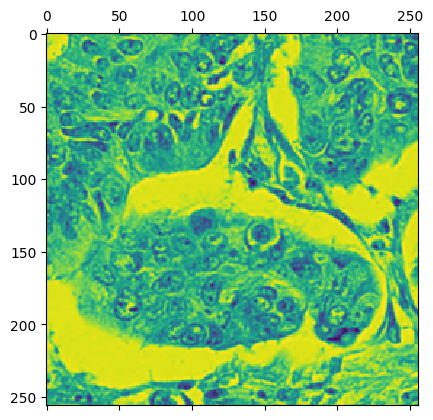

In [37]:
# example rgb2gray file
plt.matshow(rgb2gray(X_image[1]))

## plot the relationship


In [49]:
len(contrast_list)

4981

In [48]:
parameter_mvar = [[h_mean_list[i],red_mean_list[i],green_mean_list[i],blue_mean_list[i], h_var_list[i],
                 red_var_list[i], green_var_list[i], blue_var_list[i],X_pc[i],contrast_list[i],dissimilarity_list[i],
                  homogeneity_list[i],energy_list [i],correlation_list[i]]for i in range(4981) ]



In [50]:
parameter_list = [h_mean_list,red_mean_list,green_mean_list,blue_mean_list, h_var_list,
                 red_var_list, green_var_list, blue_var_list,X_pc ,contrast_list,dissimilarity_list,
                  homogeneity_list,energy_list,correlation_list]
name_list=['h_mean','red_mean','green_mean','blue_mean','h_var','red_var','green_var','blue_var','random_pca',
          'contrast','dissimilarity','homogeneity','energy','correlation']

 ##### Plot the scatter plot and calculate the correlation coefficient of each feature in Q(2i,a-c) you obtain  vs. the target variable (cell count) across all images. Which features do you think are important? Give your reasoning. [20 marks]


In [51]:
# correlation

for i in range(0,len(parameter_list)):
    corr_coef = np.corrcoef(parameter_list[i], Y_total)[0][1]
    print('Feature vs total correlation coeeficient:',name_list[i],'is',corr_coef)
    
    


Feature vs total correlation coeeficient: h_mean is -0.45890511522873734
Feature vs total correlation coeeficient: red_mean is -0.4873224330032495
Feature vs total correlation coeeficient: green_mean is -0.571776870808328
Feature vs total correlation coeeficient: blue_mean is -0.4721332911055468
Feature vs total correlation coeeficient: h_var is 0.5083281816183698
Feature vs total correlation coeeficient: red_var is 0.45574705017344574
Feature vs total correlation coeeficient: green_var is 0.22116151937268824
Feature vs total correlation coeeficient: blue_var is 0.24185060707259118
Feature vs total correlation coeeficient: random_pca is 0.6005437275325822
Feature vs total correlation coeeficient: contrast is -0.09431961277473551
Feature vs total correlation coeeficient: dissimilarity is -0.09431961277473551
Feature vs total correlation coeeficient: homogeneity is 0.09431961277473147
Feature vs total correlation coeeficient: energy is 0.09420319873592722
Feature vs total correlation coe

Feature vs total: h_mean


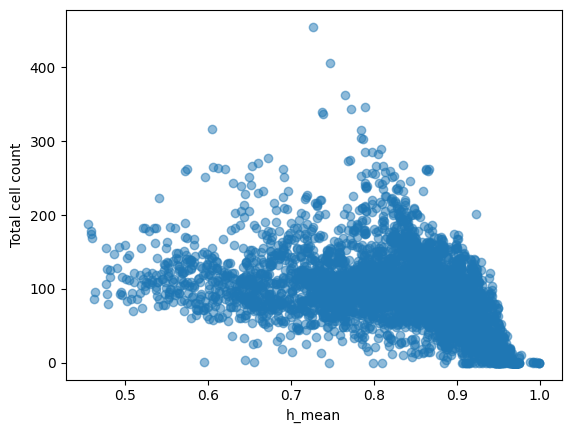

Feature vs total: red_mean


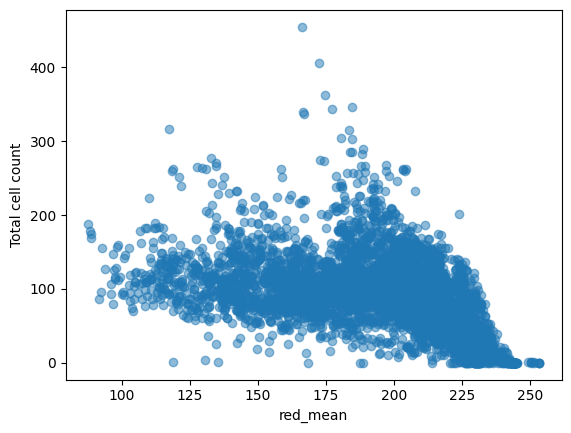

Feature vs total: green_mean


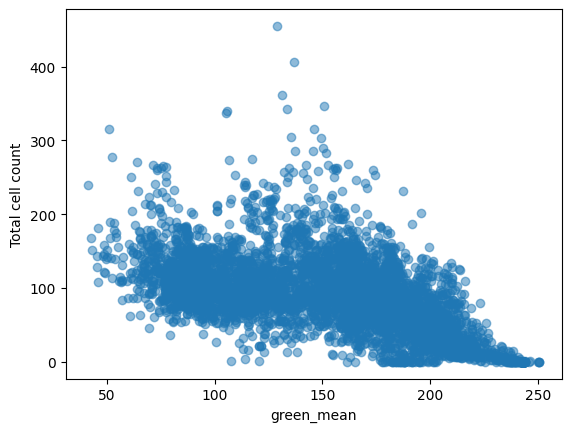

Feature vs total: blue_mean


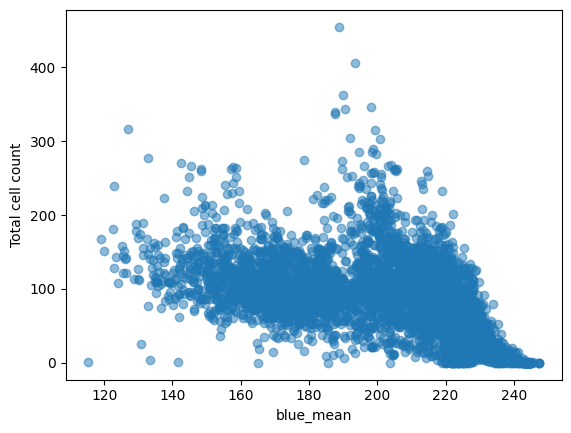

Feature vs total: h_var


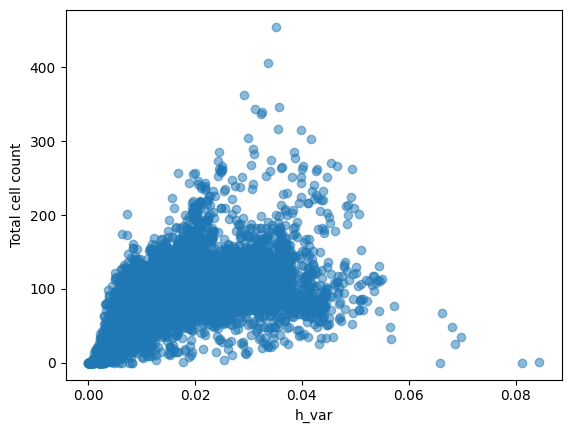

Feature vs total: red_var


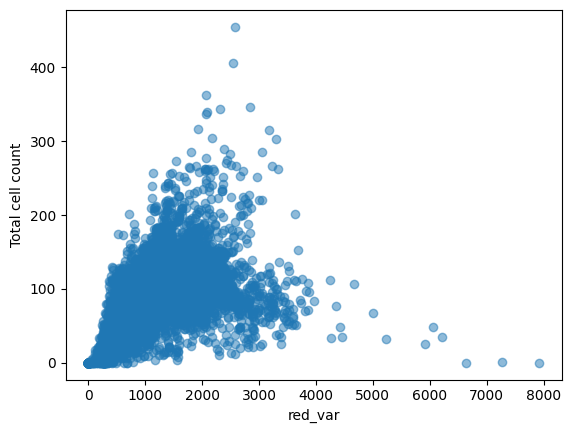

Feature vs total: green_var


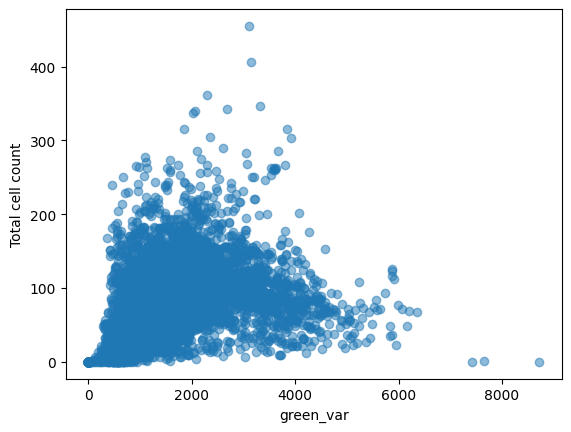

Feature vs total: blue_var


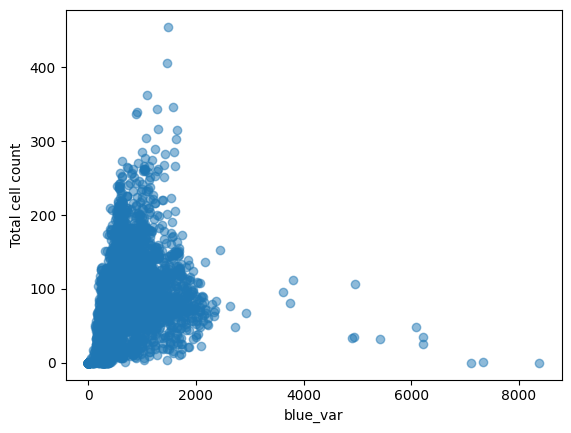

Feature vs total: random_pca


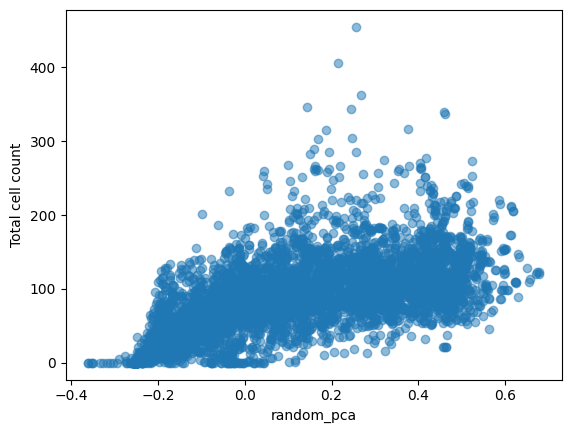

Feature vs total: contrast


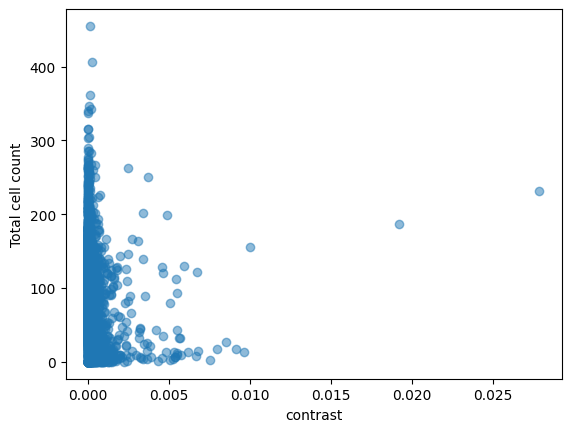

Feature vs total: dissimilarity


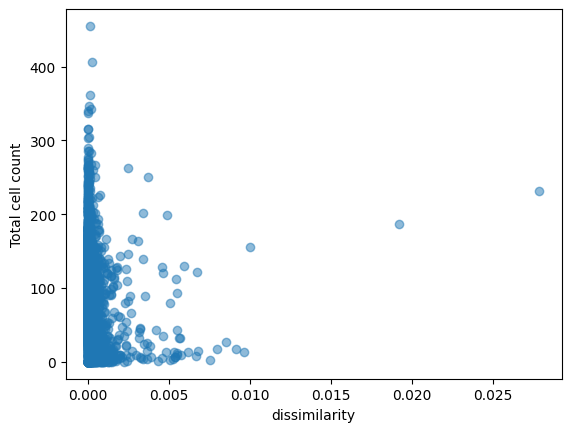

Feature vs total: homogeneity


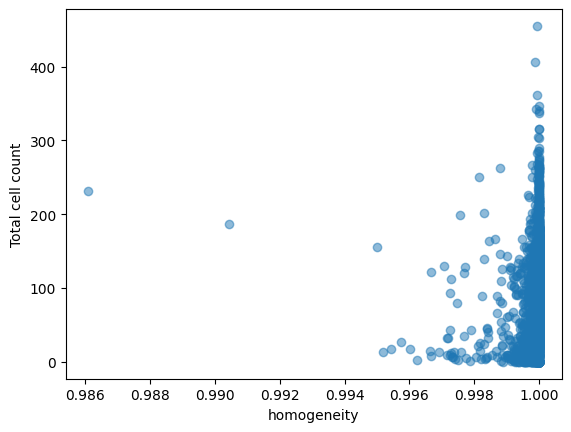

Feature vs total: energy


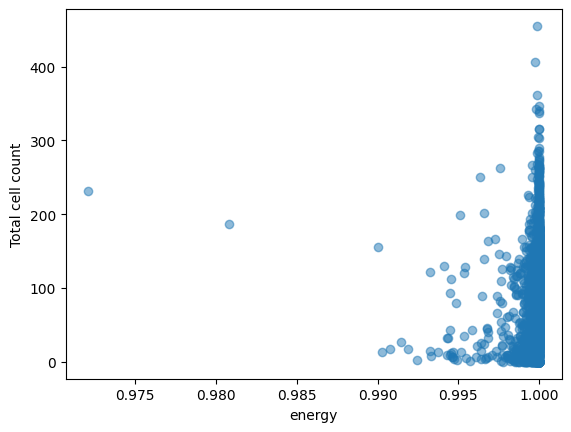

Feature vs total: correlation


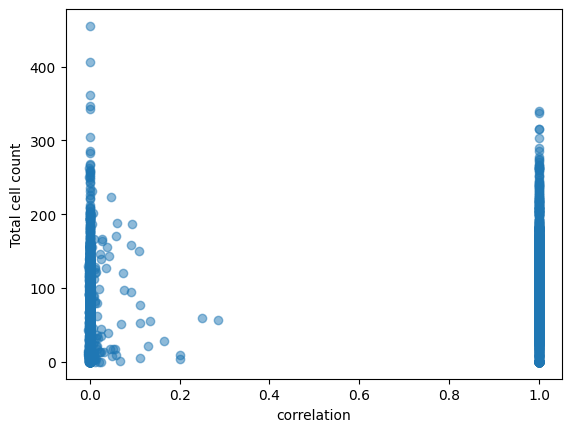

In [54]:
# scatter plot
for i in range(0,len(parameter_list)):
    
    print('Feature vs total:',name_list[i])
    plt.scatter(parameter_list[i],Y_total, alpha=0.5)
    plt.xlabel(name_list[i])
    plt.ylabel('Total cell count')
    plt.show()

Random pca feature; h_var and green_mean are more important as they have higher correlation coefficient with total number of cells

reasoning?

### Try the following regression models with the features used in part-I. Plot the scatter plot between true and predicted counts for each type of regression model for the test data. Also, report your prediction performance in terms of RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient and R2 score (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) on the test data.  [20 Marks]

scale the model, as we claimed before scale and normalize is useful. After scale and normalize the performance of models increased. scale will not affect OLS performance but normalize will. scale can also affect perfomance for MLP and SVR.
I didn't include dev here 

In [56]:
# standard scaler
scaler = StandardScaler()
# use this to fit pca only scaled
p_scaled = scaler.fit_transform(parameter_mvar)

# normalize
# X_normalized = normalize(X_scaled)
p_normalized=normalize(p_scaled) 

In [57]:
# Number of features
len(p_normalized[1])

14

## OLS model
The result shows the final model including best features after I make adjustment.

In [58]:
# get fold 1
train_list = [p_normalized[i] for i in index_1]
# get fold 2
dev_list = [p_normalized[i]for i in index_2]
# get fold 3
test_list=[p_normalized[i] for i in index_3]


print('The number of examples in fold 1 is:',len(train_list))
print('The number of examples in fold 2 is:',len(dev_list))
print('The number of examples in fold 3 is:',len(test_list))
# 




The number of examples in fold 1 is: 1622
The number of examples in fold 2 is: 1751
The number of examples in fold 3 is: 1608


In [59]:
# OLS

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

# Generate some random data
X= train_list
Y=fold_Y1['total']
# Split the data into training and test sets


# Fit the OLS regression model on the training data
reg = LinearRegression()
reg.fit(X, Y)

# Make predictions on the test data
y_pred = reg.predict(dev_list)

y_test=fold_Y2['total']

In [60]:
def evaluate_matrix(ytrue, ypredict):
    rmse = np.sqrt(mean_squared_error(ytrue, ypredict))
    pearson = pearsonr(ytrue, ypredict)[0]
    spearman = spearmanr(ytrue, ypredict)[0]
    r2 = r2_score(ytrue, ypredict)
    print('RMSE of the model images: {:.2f}'.format(rmse))
    print('Pearson correlation coefficient: {:.2f}'.format(pearson))
    print('Spearman correlation coefficient: {:.2f}'.format(spearman))
    print('R2: {:.2f}'.format(r2))
    # Plot the scatter plot between true and predicted counts for the test data
    plt.scatter(ypredict, ytrue)
    plt.ylabel('True Counts')
    plt.xlabel('Predicted Counts')
    plt.show()

    return rmse, pearson, spearman, r2

RMSE: 34.27946079291446
Pearson Correlation Coefficient: 0.7459844466200644
Spearman Correlation Coefficient: 0.7953205846555932
R2 Score: 0.5495842939713892


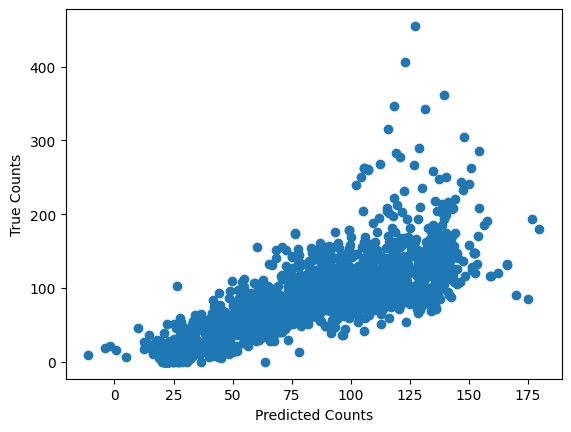

In [61]:
# Calculate the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

# Calculate the Pearson correlation coefficient
pearson_corr, _ = pearsonr(y_test, y_pred)
print('Pearson Correlation Coefficient:', pearson_corr)

# Calculate the Spearman correlation coefficient
spearman_corr, _ = spearmanr(y_test, y_pred)
print('Spearman Correlation Coefficient:', spearman_corr)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

# Plot the scatter plot between true and predicted counts for the test data
plt.scatter(y_pred, y_test)
plt.ylabel('True Counts')
plt.xlabel('Predicted Counts')
plt.show()



RMSE of the model images: 41.40
Pearson correlation coefficient: 0.61
Spearman correlation coefficient: 0.65
R2: 0.29


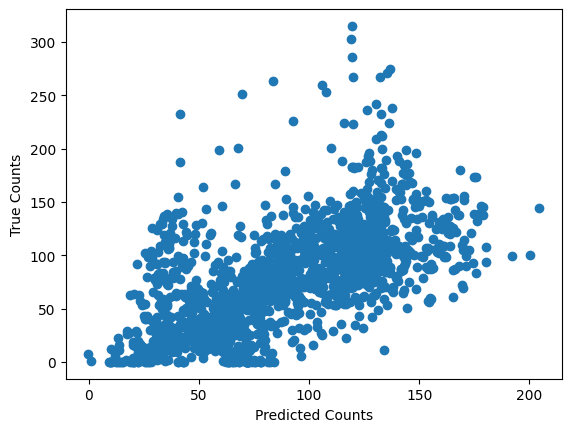

In [62]:
# get score on test set
# Make predictions on the test data
y_pred_ols = reg.predict(test_list)

y_test_ols =fold_Y3['total']
rmse_ols,pearson_ols,spearman_ols,r2_ols=evaluate_matrix(y_test_ols,y_pred_ols)

#### SVR model

In [63]:
# svr
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

# Generate some random data
X=  train_list
Y=fold_Y1['total']

# Split the data into training and test sets


# Fit the SVR model on the training data
reg = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
reg.fit(X, Y)

# Make predictions on the test data
y_pred = reg.predict(dev_list)

y_test=fold_Y2['total']


RMSE of the model images: 36.57
Pearson correlation coefficient: 0.71
Spearman correlation coefficient: 0.76
R2: -0.35


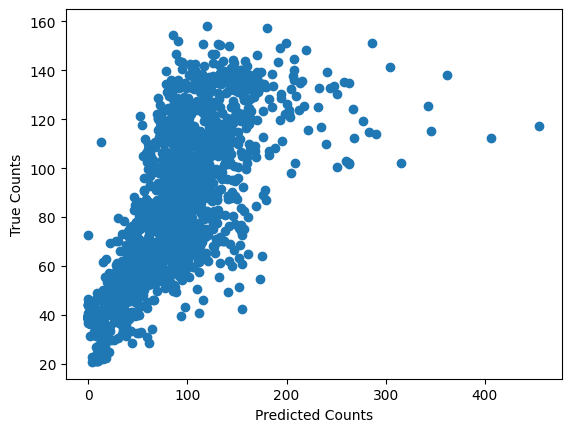

(36.57332101889583,
 0.7079473788537001,
 0.7628700118880736,
 -0.3486744321232558)

In [64]:
evaluate_matrix(y_pred,y_test)

RMSE of the model images: 39.68
Pearson correlation coefficient: 0.62
Spearman correlation coefficient: 0.66
R2: 0.35


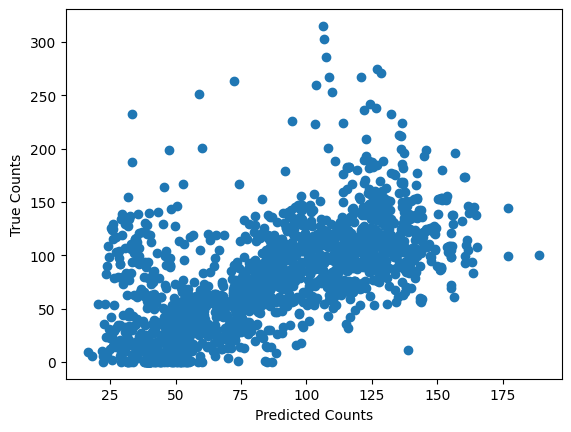

In [65]:
# get score on test set
# Make predictions on the test data
y_pred_svr = reg.predict(test_list)

y_test_svr =fold_Y3['total']
rmse_svr,pearson_svr,spearman_svr,r2_svr=evaluate_matrix(y_test_svr,y_pred_svr)

#### MLP model
MLP model is a neural network model, which requires longer time to process. But it has the best performance among three
models.

In [102]:
# MLP
from sklearn.datasets import make_regression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

# Generate some random data
X= train_list

Y=fold_Y1['total']



# Fit the MLP regression model on the training data
reg = MLPRegressor(hidden_layer_sizes=(100,50,20), activation='relu', solver='adam', alpha=1,learning_rate='adaptive',max_iter=1000)
reg.fit(X,Y)

# Make predictions on the test data
y_pred = reg.predict(dev_list)


y_true=fold_Y2['total']

RMSE of the model images: 20.30
Pearson correlation coefficient: 0.92
Spearman correlation coefficient: 0.91
R2: 0.80


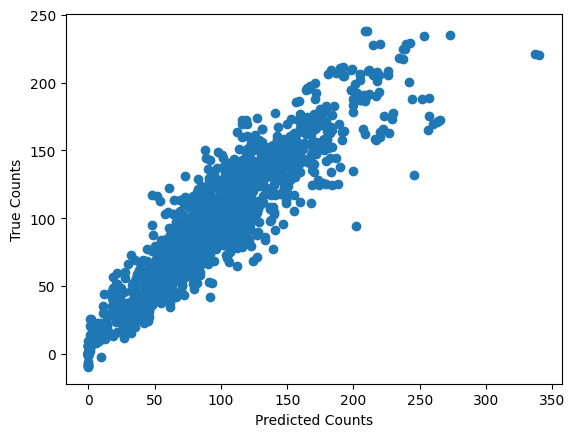

(20.301229899419223, 0.9156921121307169, 0.911450806521286, 0.8042174213276714)

In [98]:
evaluate_matrix(reg.predict(train_list),Y)

RMSE of the model images: 35.47
Pearson correlation coefficient: 0.73
Spearman correlation coefficient: 0.76
R2: -0.06


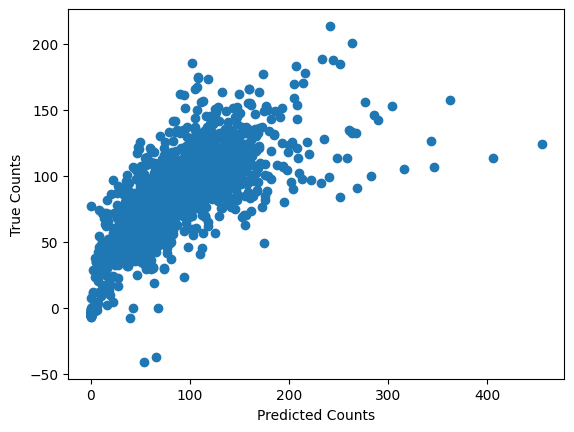

(35.465158510508594,
 0.726667637197299,
 0.7647261228378683,
 -0.061738761658135966)

In [103]:
evaluate_matrix(y_pred,y_test)

In [71]:
## read data

RMSE of the model images: 38.08
Pearson correlation coefficient: 0.69
Spearman correlation coefficient: 0.72
R2: 0.40


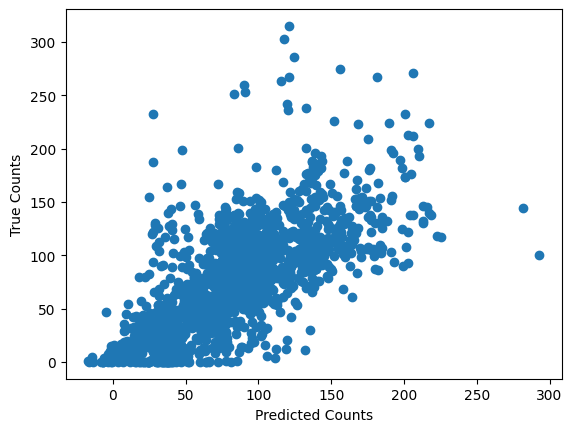

In [104]:
y_pred_mlp = reg.predict(test_list)

y_test_mlp =fold_Y3['total']
rmse_mlp,pearson_mlp,spearman_mlp,r2_mlp=evaluate_matrix(y_test_mlp,y_pred_mlp)

In [105]:
# import some libraries for question 1 
import csv
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
# cnn tensor
import torch
from torch.utils.data import DataLoader, TensorDataset
# cnn
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.optim.lr_scheduler as lr_scheduler

import torchvision.models as models
# report
import numpy as np
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_squared_error, r2_score


I will discuss the performance matrix at the end of the assignment

# Part3: Q1
a.Use a convolutional neural network (in PyTorch) to solve this problem in much the same was as in part (ii) of Question (2). You are to develop an architecture of the neural network that takes an image directly as input and produces a count as the output corresponding to the total number of cells. You are free to choose any network structure as long as you can show that it gives good performance. Report your results on the test examples by plotting the scatter plot between true and predicted counts on the test data. Also, report your results in terms of RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient and R2 score. You will be evaluated on the design of your machine learning model and final performance metrics. Try to get the best test performance you can. Please include convergence plots in your submission showing how does loss change over training epochs. [20 Marks]

I used pretrained model Covnet18 and Covnet50 in this task. Pretrained models have better perofrmance. It is suitable for image recognition.  I tried some design with conv layer and pool layer  but the performance is worse than pretrained model. since this is also from the Pytorch so i think it meets the requirement. I did many changes on paramter setting.

In [106]:
# import some libraries for question 1 
import csv
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
# cnn tensor
import torch
from torch.utils.data import DataLoader, TensorDataset
# cnn
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.optim.lr_scheduler as lr_scheduler
import torchvision.models as models
# report
import numpy as np
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_squared_error, r2_score

### **data** load


In [107]:
X1 = np.array(fold_X1).astype(np.float32)
X2 = np.array(fold_X2).astype(np.float32)
X3 = np.array(fold_X3).astype(np.float32)

In [108]:

# Convert X_train and  to tensors
X_train = torch.from_numpy(X1)
# need to change 256x256x3 into 3x256x256 format
Xtrain=X_train.permute(0, 3, 1, 2)
# Convert dev
X_dev = torch.from_numpy(X2)
Xdev=X_dev.permute(0, 3, 1, 2)

# convert Xtest to tensor
X_test = torch.from_numpy(X3)
Xtest=X_test.permute(0, 3, 1, 2)

In [109]:
# get data loader for all
def cnn_data_loader(name,batch_size):
    Y_train1 = fold_Y1[name].tolist()
    Y_dev=fold_Y2[name].tolist()
    Y_test1=fold_Y3[name].tolist()
    # Convert X_train and Y_train to tensors
   
    Ytrain = torch.tensor(Y_train1, dtype=torch.long)
    # Convert dev

    Ydev = torch.tensor(Y_dev, dtype=torch.long)
    # Create a TensorDataset
    Ytest = torch.tensor(Y_test1, dtype=torch.long)

    # Create a DataLoader for the training and dev data
    train_data= TensorDataset(Xtrain, Ytrain)
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    # to test whether overfit
    dev_data=TensorDataset(Xdev, Ydev)
    dev_loader = DataLoader(dev_data, batch_size=batch_size, shuffle=True)
    # convert test

    test_data=TensorDataset(Xtest, Ytest)
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)
    return train_loader,dev_loader,test_loader

In [110]:
# My own trained model works worse than resnet
# I added and pool layer convlution layer, relu activation funtion and batch norm
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(64*64*32,1)
        self.dropout = nn.Dropout(p=0.1) # add dropout layer
        self.sigmoid = nn.Sigmoid() # add sigmoid layer
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.dropout(out) # apply dropout
        out = self.fc(out)
        out = self.sigmoid(out) # apply sigmoid
        return out.squeeze(1) # output single value

In [111]:
# at first I don't want to set so many parameter for function but it always report error
# for example if I do not put device in , it report input type and weight type error
def train_covnet18(num_epochs,device,learning_rate,weight_decay,step_size,gamma,model,train_loader):
  model=model.to(device)
  criterion = nn.MSELoss()
  optimizer =torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=weight_decay)
  scheduler = lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)
  # Training ResNet18
  loss_list = []
  epochs = num_epochs
  for epoch in range(epochs):
    model.train()
    scheduler.step()
    training_loss = 0

    for images, labels in train_loader:
        # Zero gradient
        optimizer.zero_grad()

        images=images.to(device)
        labels = labels.to(device)

        labels = labels.to(torch.float32)
        labels = labels.unsqueeze(1)
        outputs = model(images)
        outputs = outputs.to(torch.float32)

        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

        training_loss += loss.item() * images.size(0)

    epoch_loss = training_loss / len(train_loader.dataset)





      
    loss_list.append(epoch_loss)

    print("Epoch [{}/{}], Loss: {:.4f}".format(epoch+1, num_epochs, epoch_loss))

  plt.plot(loss_list, label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  return model

In [112]:

def test_evaluate(model,data_loader):
    model=model
    model.eval()  # eval mode (used for test)
    with torch.no_grad():
        y_pred=[]
        y_label=[]
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
          
            
            y_label.extend(labels)
            y_pred.extend(outputs)
        print(type(y_label[1]),type(y_label[1]))
        y_l= [float(item) for item in y_label]
        y_p= [float(item) for item in y_pred]
        return y_l,y_p




In [113]:

def evaluate_matrix2(model2,dataloader):
    ytrue,ypredict=test_evaluate(model2,dataloader)
    rmse = np.sqrt(mean_squared_error(ytrue, ypredict))
    pearson = pearsonr(ytrue, ypredict)[0]
    spearman = spearmanr(ytrue, ypredict)[0]
    r2 = r2_score(ytrue, ypredict)
    print('RMSE of the model images: {:.2f}'.format(rmse))
    print('Pearson correlation coefficient: {:.2f}'.format(pearson))
    print('Spearman correlation coefficient: {:.2f}'.format(spearman))
    print('R2: {:.2f}'.format(r2))
    # Plot the scatter plot between true and predicted counts for the test data
    plt.scatter(ypredict, ytrue)
    plt.ylabel('True Counts')
    plt.xlabel('Predicted Counts')
    plt.show()
    return rmse, pearson, spearman, r2

### Train and test for total 

In [ ]:
# define model 1 for total cell prediction
num_epochs = 20
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_epochs = 20
batch_size = 32
learning_rate = 0.001
weight_decay=0
step_size=5
gamma=1 # no learning rate decay
criterion = nn.MSELoss()

# model for task 1
model1 = models.resnet18(pretrained=True)
model1.fc = nn.Linear(model1.fc.in_features,1)
model1.to(device)


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch [1/20], Loss: 8771.1417
Epoch [2/20], Loss: 3382.3382
Epoch [3/20], Loss: 742.0495
Epoch [4/20], Loss: 283.1232
Epoch [5/20], Loss: 243.2896
Epoch [6/20], Loss: 178.4544
Epoch [7/20], Loss: 176.3750
Epoch [8/20], Loss: 177.6521
Epoch [9/20], Loss: 186.9287
Epoch [10/20], Loss: 147.8356
Epoch [11/20], Loss: 148.3310
Epoch [12/20], Loss: 119.2168
Epoch [13/20], Loss: 123.5030
Epoch [14/20], Loss: 109.8537
Epoch [15/20], Loss: 122.5544
Epoch [16/20], Loss: 100.5476
Epoch [17/20], Loss: 132.7912
Epoch [18/20], Loss: 107.4578
Epoch [19/20], Loss: 84.5891
Epoch [20/20], Loss: 107.5441


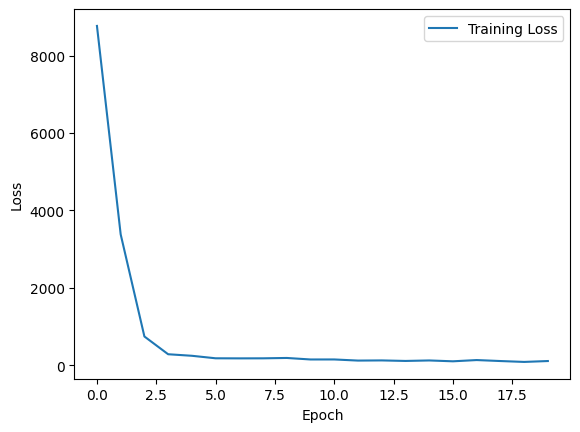

In [115]:

train_loader1,dev_loader1,test_loader1=cnn_data_loader('total',32)
model1_trained=train_covnet18(num_epochs,device,learning_rate,weight_decay,step_size,gamma,model1,train_loader1)

Results for fold 1(train test) total cell number:
<class 'torch.Tensor'> <class 'torch.Tensor'>
RMSE of the model images: 5.25
Pearson correlation coefficient: 1.00
Spearman correlation coefficient: 1.00
R2: 0.99


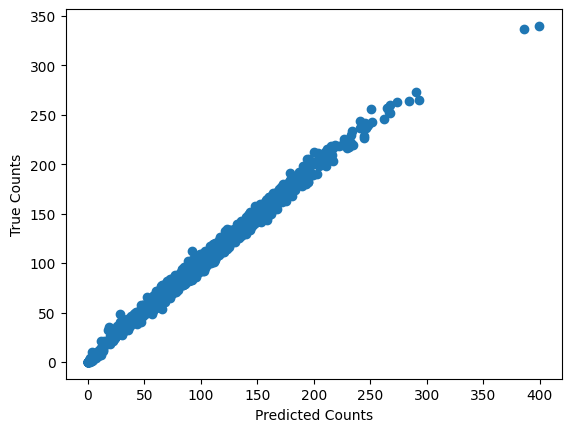

(5.252392622493155, 0.9955731673517331, 0.9954041793734378, 0.98917206023167)

In [116]:
print( 'Results for fold 1(train test) total cell number:')
evaluate_matrix2(model1_trained,train_loader1)

Results for fold 2(dev test) total cell number:
<class 'torch.Tensor'> <class 'torch.Tensor'>
RMSE of the model images: 13.13
Pearson correlation coefficient: 0.97
Spearman correlation coefficient: 0.96
R2: 0.93


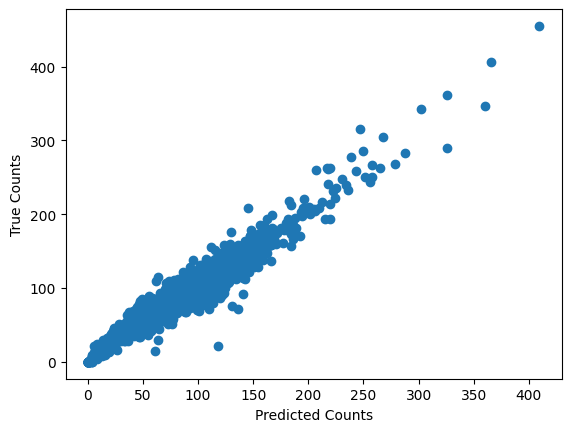

(13.128911846779923,
 0.9693660877666643,
 0.9601408159184542,
 0.9339301947527526)

In [117]:
print( 'Results for fold 2(dev test) total cell number:')
evaluate_matrix2(model1_trained,dev_loader1)

In [118]:
# get predict value and label for test set only
y_label_18,y_pred_18=test_evaluate(model1_trained,test_loader1)

<class 'torch.Tensor'> <class 'torch.Tensor'>


Results for fold 3(test test) total cell number:
<class 'torch.Tensor'> <class 'torch.Tensor'>
RMSE of the model images: 15.40
Pearson correlation coefficient: 0.95
Spearman correlation coefficient: 0.95
R2: 0.90


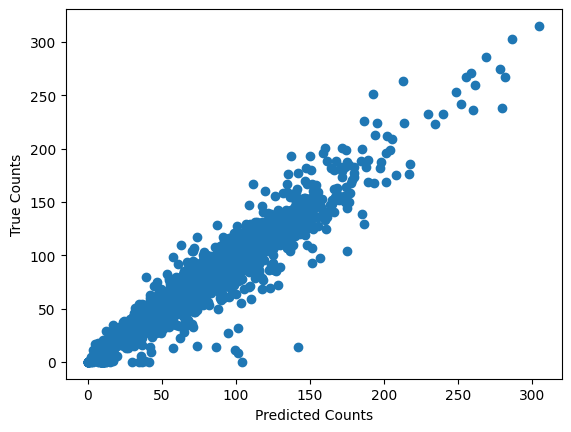

In [119]:
print( 'Results for fold 3(test test) total cell number:')
rmse_18_1, pearson_18_1, spearman_18_1, r2_18_1=evaluate_matrix2(model1_trained,test_loader1)

we can see that covnet18 's performance is outstanding on cell count task. with correlation nearly 1 and larger than 0.9 R2. There is a little over fit as train set's performance is better than dev and test set. so I added L2 regularization (weight decay) Large weight decay will cause the loss harder to drop.
But The performance didint change much.
The performance here is good so I did not do much parameter alter.

In [120]:

# Save the trained model to a file
PATH1 = 'resnet18_total.pth'
torch.save(model1_trained.state_dict(), PATH1)

# Load the model from a file
PATH1 = 'resnet18_total.pth'
model1 = models.resnet18(pretrained=True)
model1.fc = nn.Linear(model1.fc.in_features, 1)
model1.to(device)
model1.load_state_dict(torch.load(PATH1))


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

## Q2 :b.Use a convolutional neural network (in Pytorch) to predict the counts of 6 types of cells simultaneously given the image patch as input as well as the total number of cells (7 outputs in total). You are free to choose any network structure as long as you can show that it gives good cross-validation performance. Report the results for the test fold for each cell type in the form of separate predicted-vs-actual count scatter plots (3 folds, 6 cell types and 1 as the total number of cells so 21 plots in total) using your optimal machine learning model and report your results in terms of RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient and R2 score for each cell type and the total number of cells. [20 Marks]
HINT: 
A naïve (but possibly effective) strategy can be to simply try the same network architecture in 3(a) and train 7 different models separately for each cell type. 


 ### T1: neutrophil 


In [ ]:
torch.cuda.empty_cache()
torch.cuda.empty_cache() 

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch [1/20], Loss: 9.5298
Epoch [2/20], Loss: 3.1891
Epoch [3/20], Loss: 2.8452
Epoch [4/20], Loss: 2.0708
Epoch [5/20], Loss: 1.2942
Epoch [6/20], Loss: 0.8674
Epoch [7/20], Loss: 0.4636
Epoch [8/20], Loss: 0.5213
Epoch [9/20], Loss: 0.5154
Epoch [10/20], Loss: 0.3850
Epoch [11/20], Loss: 0.5960
Epoch [12/20], Loss: 0.4047
Epoch [13/20], Loss: 0.1929
Epoch [14/20], Loss: 0.3588
Epoch [15/20], Loss: 0.2912
Epoch [16/20], Loss: 0.3057
Epoch [17/20], Loss: 0.3563
Epoch [18/20], Loss: 0.3324
Epoch [19/20], Loss: 0.6032
Epoch [20/20], Loss: 0.4996


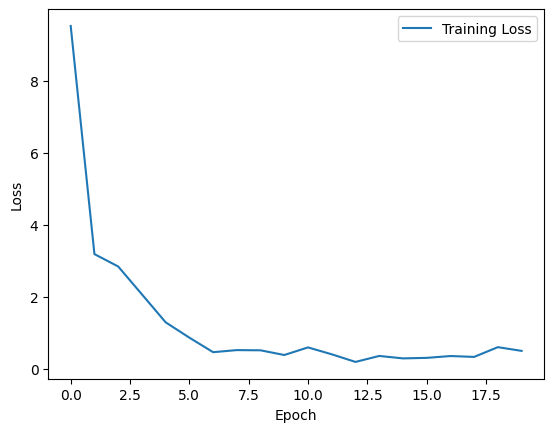

In [121]:
#  at first I want to give different model name for each model, but it requires too much work so I use model1 for all
# define model 1 for total cell prediction
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_epochs = 20
batch_size = 128 # higher 
learning_rate = 0.0001
weight_decay=0.001
step_size=5
gamma=0.4 # no decay in 5 epoches
criterion = nn.MSELoss()
# model for task 1
model1 = models.resnet50(pretrained=True)
model1.fc = nn.Linear(model1.fc.in_features,1)
p=0.2
model1.dropout=nn.Dropout(p)
model1.to(device)
#train 
train_loader2,dev_loader2,test_loader2=cnn_data_loader('neutrophil',batch_size)
model1_trained=train_covnet18(num_epochs,device,learning_rate,weight_decay,step_size,gamma,model1,train_loader2)


Use this to kill process and release gpu

In [ ]:
# !sudo fuser /dev/nvidia*

/dev/nvidia0:         1176m
/dev/nvidiactl:       1176m
/dev/nvidia-uvm:      1176m


In [ ]:
# !kill -9 1176

Results for fold 1(train_ test) T1 neutrophil  cell number:
<class 'torch.Tensor'> <class 'torch.Tensor'>
RMSE of the model images: 0.53
Pearson correlation coefficient: 1.00
Spearman correlation coefficient: 0.69
R2: 0.98


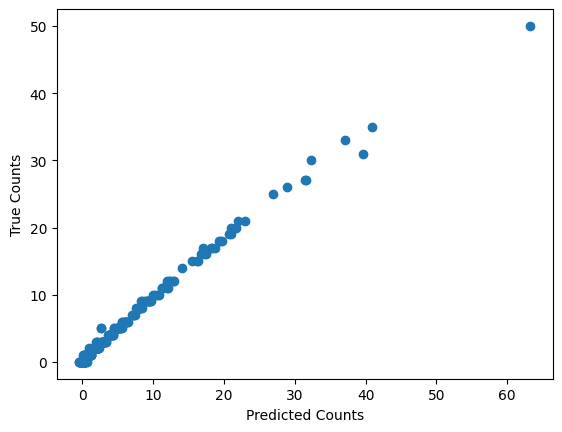

Results for fold 2(dev test) T1 neutrophil  cell number:
<class 'torch.Tensor'> <class 'torch.Tensor'>
RMSE of the model images: 2.85
Pearson correlation coefficient: 0.46
Spearman correlation coefficient: 0.30
R2: 0.19


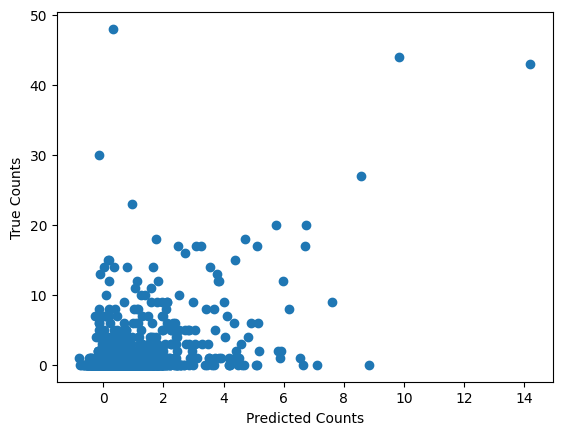

(2.848275718032201,
 0.46201797630470465,
 0.30410551805516145,
 0.19001499283158607)

In [122]:
# fold 1 result
print( 'Results for fold 1(train_ test) T1 neutrophil  cell number:')
evaluate_matrix2(model1_trained,train_loader2)
# fold2
print( 'Results for fold 2(dev test) T1 neutrophil  cell number:')
evaluate_matrix2(model1_trained,dev_loader2)



<class 'torch.Tensor'> <class 'torch.Tensor'>
Results for fold 3(test test) T1 neutrophil cell number:
<class 'torch.Tensor'> <class 'torch.Tensor'>
RMSE of the model images: 1.49
Pearson correlation coefficient: 0.50
Spearman correlation coefficient: 0.32
R2: 0.17


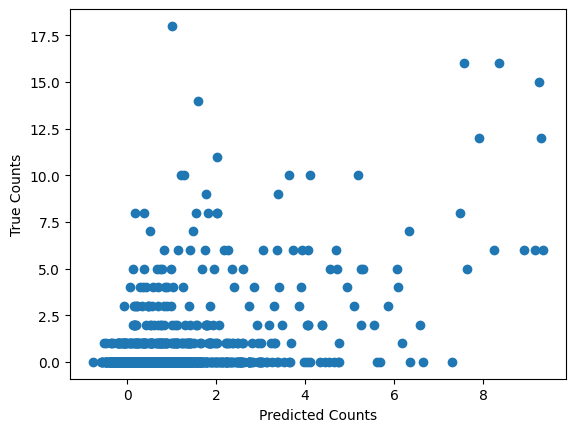

In [123]:
# fold 3
# recorded label and predict only for fold 3
y2_label_18,y2_pred_18=test_evaluate(model1_trained,test_loader2)
print( 'Results for fold 3(test test) T1 neutrophil cell number:')
rmse2_18, pearson2_18, spearman2_18, r22_18=evaluate_matrix2(model1_trained,test_loader2)

Results for T1 is alot different from total. There are many 0s in dataset. so I increased the batch size and the number of epoch. Batch size means the number of data in each learning step, if there are many zeros small batch size might cause no learning. So I used a large size. When I use the same setting as in 1 , the loss can not drop. After I changed batch size, the loss decreased and there is strong overfit as r2 for train set is nearly 1 but for dev set it is only 0.2. I can add L2 regularization and drop rate to the model to reduce the over fit. But I only have limited GPU memory, so I can not try more.


###  T2: epithelial

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more

Epoch [1/30], Loss: 2136.7570
Epoch [2/30], Loss: 540.8269
Epoch [3/30], Loss: 325.2974
Epoch [4/30], Loss: 251.4417
Epoch [5/30], Loss: 143.2837
Epoch [6/30], Loss: 127.9372
Epoch [7/30], Loss: 107.6327
Epoch [8/30], Loss: 132.2053
Epoch [9/30], Loss: 99.5323
Epoch [10/30], Loss: 93.3488
Epoch [11/30], Loss: 65.9729
Epoch [12/30], Loss: 52.0531
Epoch [13/30], Loss: 86.0299
Epoch [14/30], Loss: 69.4698
Epoch [15/30], Loss: 59.4023
Epoch [16/30], Loss: 46.2636
Epoch [17/30], Loss: 45.0151
Epoch [18/30], Loss: 47.2546
Epoch [19/30], Loss: 46.9996
Epoch [20/30], Loss: 47.0953
Epoch [21/30], Loss: 45.7612
Epoch [22/30], Loss: 39.7082
Epoch [23/30], Loss: 41.8940
Epoch [24/30], Loss: 45.9699
Epoch [25/30], Loss: 39.3387
Epoch [26/30], Loss: 31.0765
Epoch [27/30], Loss: 27.3655
Epoch [28/30], Loss: 52.7894
Epoch [29/30], Loss: 38.2168
Epoch [30/30], Loss: 22.7615


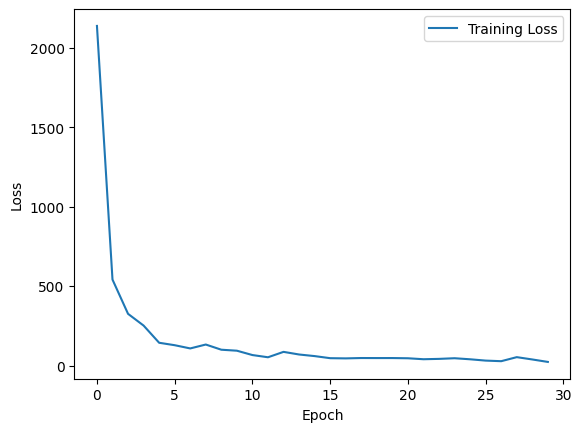

In [124]:
# define model 1 for total cell prediction
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_epochs = 30
batch_size = 32
learning_rate = 0.001
weight_decay=0.001
step_size=5
gamma=0.7 # no learning rate decay
criterion = nn.MSELoss()
# model for task 1
model1 = models.resnet18(pretrained=True)
model1.fc = nn.Linear(model1.fc.in_features,1)
model1.to(device)
#train 
train_loader3,dev_loader3,test_loader3=cnn_data_loader('epithelial',batch_size)
model1_trained=train_covnet18(num_epochs,device,learning_rate,weight_decay,step_size,gamma,model1,train_loader3)



Results for fold 2(dev test) T2 epithelial cell number:
<class 'torch.Tensor'> <class 'torch.Tensor'>
RMSE of the model images: 2.01
Pearson correlation coefficient: 1.00
Spearman correlation coefficient: 1.00
R2: 1.00


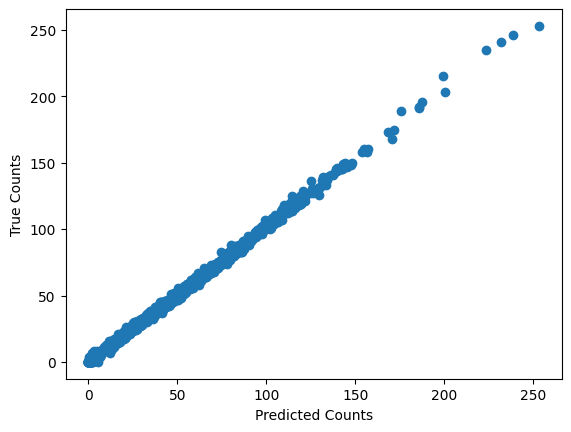

Results for fold 2(dev test) T2 epithelial cell number:
<class 'torch.Tensor'> <class 'torch.Tensor'>
RMSE of the model images: 14.28
Pearson correlation coefficient: 0.91
Spearman correlation coefficient: 0.93
R2: 0.82


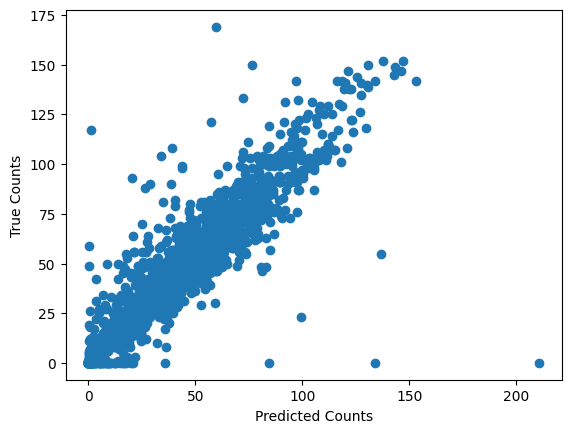

(14.283589009237534,
 0.9094118601033502,
 0.9251327102482223,
 0.8161104094840025)

In [125]:
# fold 1 result
print( 'Results for fold 2(dev test) T2 epithelial cell number:')
evaluate_matrix2(model1_trained,train_loader3)
# fold2
print( 'Results for fold 2(dev test) T2 epithelial cell number:')
evaluate_matrix2(model1_trained,dev_loader3)


<class 'torch.Tensor'> <class 'torch.Tensor'>
Results for fold 3(test test) T2 epithelial cell number:
<class 'torch.Tensor'> <class 'torch.Tensor'>
RMSE of the model images: 13.82
Pearson correlation coefficient: 0.91
Spearman correlation coefficient: 0.93
R2: 0.84


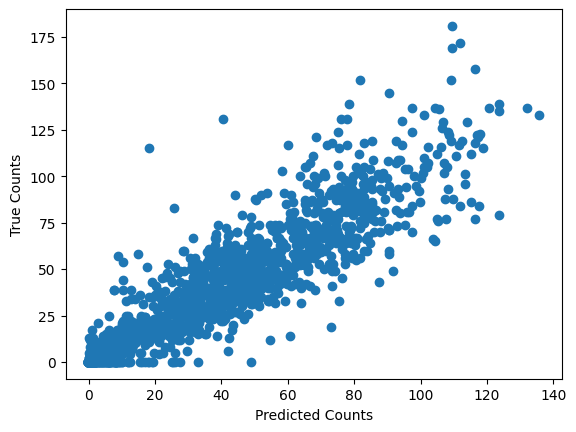

In [126]:
# fold 3
# recorded label and predict only for fold 3
y_label_18,y_pred_18=test_evaluate(model1_trained,test_loader3)
print( 'Results for fold 3(test test) T2 epithelial cell number:')
rmse3_18, pearson3_18, spearman3_18, r23_18=evaluate_matrix2(model1_trained,test_loader3)

Performance for T2 is also good, it is aorund 0.8. The train set's r2 is 0.99. So there is strong over fit. when I increase the decay weight both drops. This performance is good so I stopped editing

## T3: lymphocyte

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more

Epoch [1/20], Loss: 549.2510
Epoch [2/20], Loss: 195.4847
Epoch [3/20], Loss: 155.7689
Epoch [4/20], Loss: 163.2915
Epoch [5/20], Loss: 98.0911
Epoch [6/20], Loss: 90.8259
Epoch [7/20], Loss: 85.5974
Epoch [8/20], Loss: 81.3493
Epoch [9/20], Loss: 57.9631
Epoch [10/20], Loss: 69.4387
Epoch [11/20], Loss: 63.2380
Epoch [12/20], Loss: 38.6531
Epoch [13/20], Loss: 38.3138
Epoch [14/20], Loss: 37.6465
Epoch [15/20], Loss: 33.6749
Epoch [16/20], Loss: 33.2863
Epoch [17/20], Loss: 39.8652
Epoch [18/20], Loss: 32.3248
Epoch [19/20], Loss: 37.8213
Epoch [20/20], Loss: 24.4012


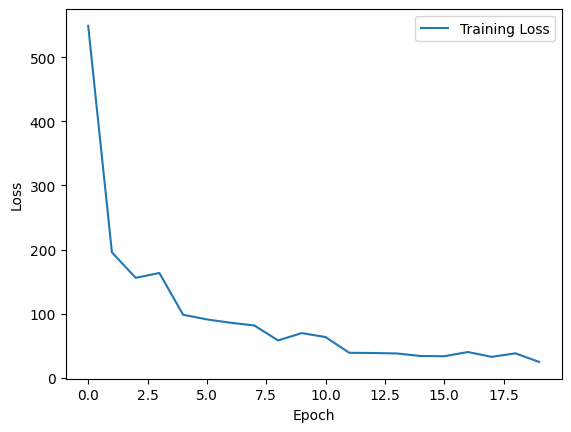

In [127]:
# define model 1 for total cell prediction
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_epochs = 20
batch_size = 32
learning_rate = 0.001
weight_decay=0.001
step_size=5
gamma=0.6 # 0.7learning rate decay
criterion = nn.MSELoss()
# model for task 1
model1 = models.resnet18(pretrained=True)
model1.fc = nn.Linear(model1.fc.in_features,1)
model1.to(device)
#train 
train_loader4,dev_loader4,test_loader4=cnn_data_loader('lymphocyte',batch_size)
model1_trained=train_covnet18(num_epochs,device,learning_rate,weight_decay,step_size,gamma,model1,train_loader4)


Results for fold 2(dev test)  T3 lymphocyte cell number:
<class 'torch.Tensor'> <class 'torch.Tensor'>
RMSE of the model images: 2.45
Pearson correlation coefficient: 1.00
Spearman correlation coefficient: 0.98
R2: 0.99


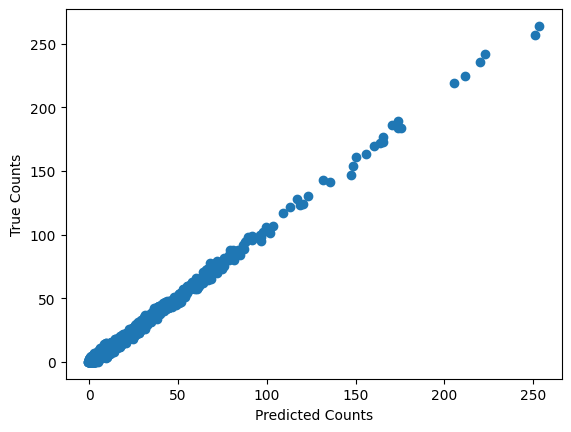

Results for fold 2(dev test) T3 lymphocyte cell number:
<class 'torch.Tensor'> <class 'torch.Tensor'>
RMSE of the model images: 15.50
Pearson correlation coefficient: 0.92
Spearman correlation coefficient: 0.93
R2: 0.78


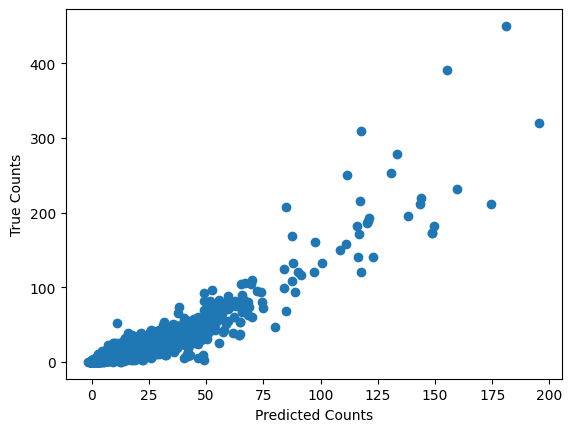

(15.495410938060658,
 0.9159171297160986,
 0.9256509054851854,
 0.7787954391350844)

In [128]:
# fold 1 result
print( 'Results for fold 2(dev test)  T3 lymphocyte cell number:')
evaluate_matrix2(model1_trained,train_loader4)
# fold2
print( 'Results for fold 2(dev test) T3 lymphocyte cell number:')
evaluate_matrix2(model1_trained,dev_loader4)

<class 'torch.Tensor'> <class 'torch.Tensor'>
Results for fold 3(test test) T3 lymphocyte cell number:
<class 'torch.Tensor'> <class 'torch.Tensor'>
RMSE of the model images: 11.78
Pearson correlation coefficient: 0.93
Spearman correlation coefficient: 0.90
R2: 0.84


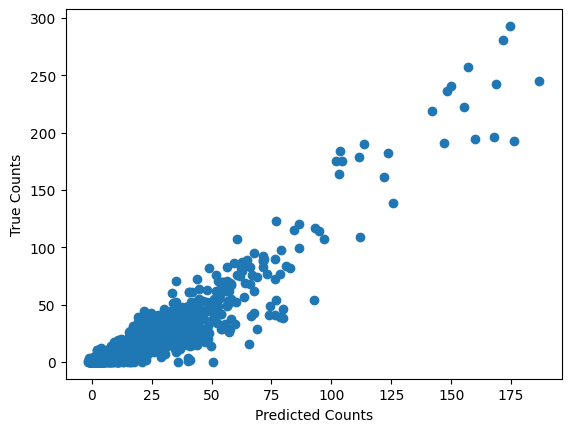

In [129]:
# fold 3
# recorded label and predict only for fold 3
y4_label_18,y4_pred_18=test_evaluate(model1_trained,test_loader4)
print( 'Results for fold 3(test test) T3 lymphocyte cell number:')
rmse4_18, pearson4_18, spearman4_18, r24_18=evaluate_matrix2(model1_trained,test_loader4)

the performance on T3 is nice, which is around 0.82. I edited the learning rate and increase the decay ratio. 

## T4: plasma

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more

Epoch [1/10], Loss: 43.5672
Epoch [2/10], Loss: 18.0011
Epoch [3/10], Loss: 13.8244
Epoch [4/10], Loss: 11.5379
Epoch [5/10], Loss: 10.7000
Epoch [6/10], Loss: 6.9653
Epoch [7/10], Loss: 7.3143
Epoch [8/10], Loss: 6.2184
Epoch [9/10], Loss: 4.0000
Epoch [10/10], Loss: 4.6256


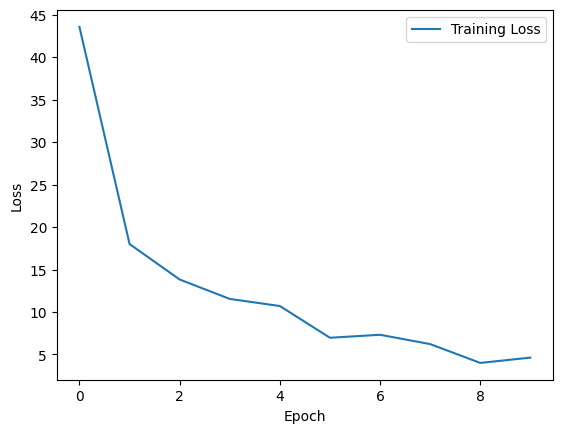

In [155]:
# define model 1 for total cell prediction
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_epochs = 10
batch_size = 16
learning_rate = 0.0001
weight_decay=0.01
step_size=5
gamma=0.4 #  learning rate decay
criterion = nn.MSELoss()
# model for task 1
model1 = models.resnet50(pretrained=True)
model1.fc = nn.Linear(model1.fc.in_features,1)
p=0.4
model1.dropout=nn.Dropout(p)
model1.to(device)
#train 
train_loader5,dev_loader5,test_loader5=cnn_data_loader('plasma',batch_size)
model1_trained=train_covnet18(num_epochs,device,learning_rate,weight_decay,step_size,gamma,model1,train_loader5)



Results for fold 2(dev test) total cell number:
<class 'torch.Tensor'> <class 'torch.Tensor'>
RMSE of the model images: 0.79
Pearson correlation coefficient: 1.00
Spearman correlation coefficient: 0.96
R2: 0.99


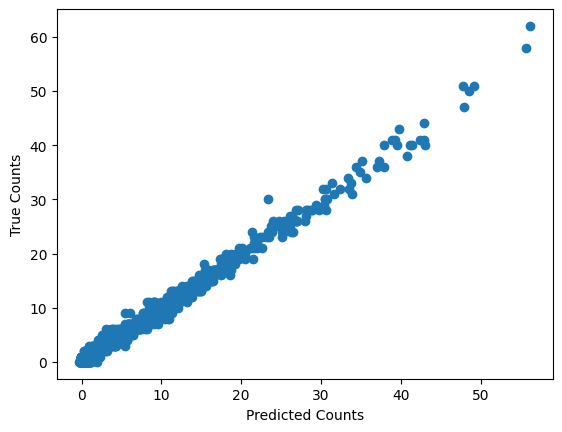

Results for fold 2(dev test) total cell number:
<class 'torch.Tensor'> <class 'torch.Tensor'>
RMSE of the model images: 4.31
Pearson correlation coefficient: 0.82
Spearman correlation coefficient: 0.80
R2: 0.67


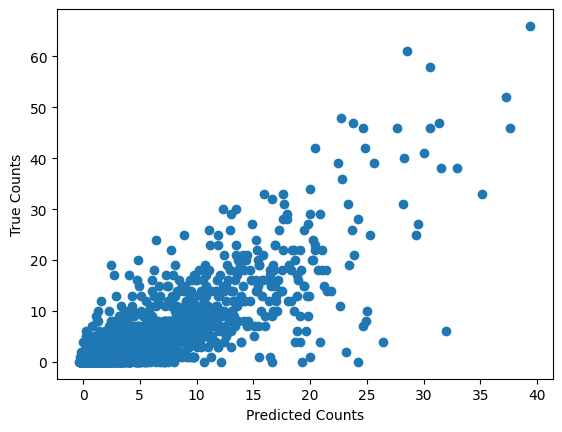

(4.31377661063784, 0.8206649705738359, 0.8017896099282893, 0.6718326020572414)

In [153]:
# fold 1 result
print( 'Results for fold 2(dev test) total cell number:')
evaluate_matrix2(model1_trained,train_loader5)
# fold2
print( 'Results for fold 2(dev test) total cell number:')
evaluate_matrix2(model1_trained,dev_loader5)

<class 'torch.Tensor'> <class 'torch.Tensor'>
Results for fold 3(test test) total cell number:
<class 'torch.Tensor'> <class 'torch.Tensor'>
RMSE of the model images: 6.21
Pearson correlation coefficient: 0.70
Spearman correlation coefficient: 0.76
R2: 0.48


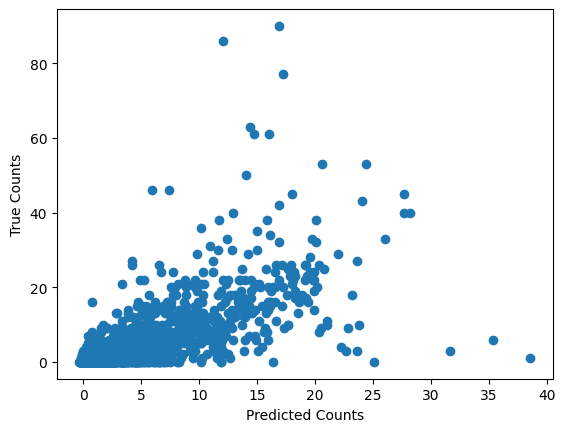

In [154]:
# fold 3
# recorded label and predict only for fold 3
y5_label_18,y5_pred_18=test_evaluate(model1_trained,test_loader5)
print( 'Results for fold 3(test test) total cell number:')
rmse5_18, pearson5_18, spearman5_18, r25_18=evaluate_matrix2(model1_trained,test_loader5)

## T5: eosinophil 

Epoch [1/20], Loss: 2007.7519
Epoch [2/20], Loss: 473.1220
Epoch [3/20], Loss: 236.0860
Epoch [4/20], Loss: 183.8824
Epoch [5/20], Loss: 162.0473
Epoch [6/20], Loss: 126.8921
Epoch [7/20], Loss: 101.9387
Epoch [8/20], Loss: 94.5477
Epoch [9/20], Loss: 82.2605
Epoch [10/20], Loss: 165.5685
Epoch [11/20], Loss: 85.6600
Epoch [12/20], Loss: 79.1047
Epoch [13/20], Loss: 70.0517
Epoch [14/20], Loss: 98.3603
Epoch [15/20], Loss: 110.6791
Epoch [16/20], Loss: 80.3454
Epoch [17/20], Loss: 59.7473
Epoch [18/20], Loss: 59.5737
Epoch [19/20], Loss: 57.0138
Epoch [20/20], Loss: 48.8057


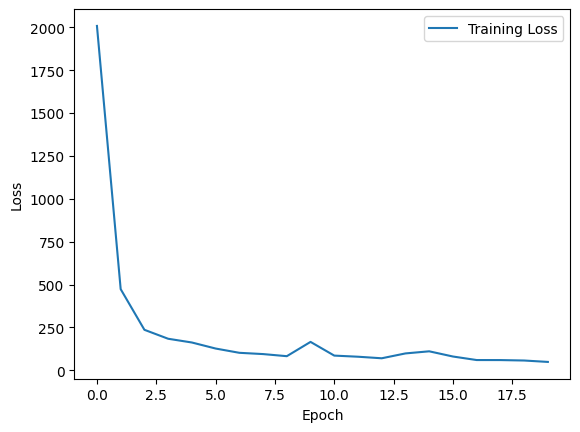

In [156]:
# define model 1 for total cell prediction
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_epochs = 20
batch_size = 64
learning_rate = 0.001
weight_decay=0.001
step_size=5
gamma=1 # no learning rate decay
criterion = nn.MSELoss()
# model for task 1
model1 = models.resnet50(pretrained=True)
model1.fc = nn.Linear(model1.fc.in_features,1)
p = 0.5 # dropout probability
model1.dropout = nn.Dropout(p)
model1.to(device)
#train 
train_loader6,dev_loader6,test_loader6=cnn_data_loader('eosinophil',batch_size)
model1_trained=train_covnet18(num_epochs,device,learning_rate,weight_decay,step_size,gamma,model1,train_loader6)



Results for fold 2(dev test) total cell number:
<class 'torch.Tensor'> <class 'torch.Tensor'>
RMSE of the model images: 4.65
Pearson correlation coefficient: 1.00
Spearman correlation coefficient: 0.99
R2: 0.98


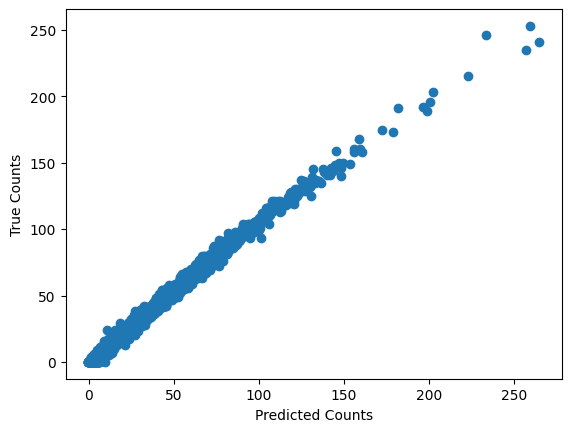

Results for fold 2(dev test) total cell number:
<class 'torch.Tensor'> <class 'torch.Tensor'>
RMSE of the model images: 18.11
Pearson correlation coefficient: 0.85
Spearman correlation coefficient: 0.91
R2: 0.70


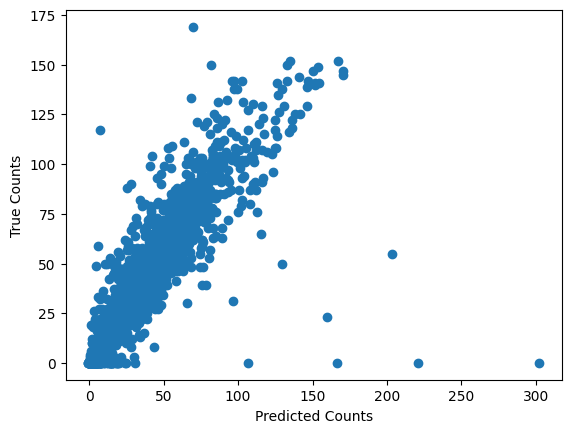

(18.112901159389654,
 0.8525908300831387,
 0.9114755179993173,
 0.7042951217093956)

In [157]:
# fold 1 result
print( 'Results for fold 2(dev test) total cell number:')
evaluate_matrix2(model1_trained,train_loader6)
# fold2
print( 'Results for fold 2(dev test) total cell number:')
evaluate_matrix2(model1_trained,dev_loader6)

<class 'torch.Tensor'> <class 'torch.Tensor'>
Results for fold 3(test test) total cell number:
<class 'torch.Tensor'> <class 'torch.Tensor'>
RMSE of the model images: 15.89
Pearson correlation coefficient: 0.89
Spearman correlation coefficient: 0.90
R2: 0.78


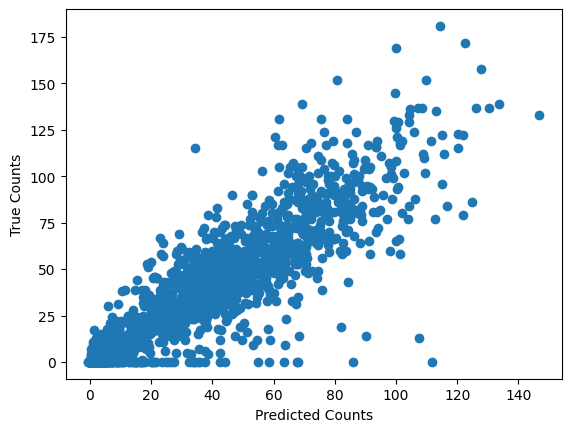

In [158]:
# fold 3
# recorded label and predict only for fold 3
y6_label_18,y6_pred_18=test_evaluate(model1_trained,test_loader6)
print( 'Results for fold 3(test test) total cell number:')
rmse6_18, pearson6_18, spearman6_18, r26_18=evaluate_matrix2(model1_trained,test_loader6)

T5 cell is also a hard task most of the cell ocunt is zero, so I used a more complex model covnet50 with deeper desgin. This is one of the method to deal with sparse set. I also added  the drop rate=0.5. The final R2 was 0.76 which is fine so I stopped editing.

## T6: connective

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more

Epoch [1/30], Loss: 299.2704
Epoch [2/30], Loss: 113.6187
Epoch [3/30], Loss: 85.5715
Epoch [4/30], Loss: 74.0717
Epoch [5/30], Loss: 47.4261
Epoch [6/30], Loss: 39.4987
Epoch [7/30], Loss: 36.2085
Epoch [8/30], Loss: 30.4640
Epoch [9/30], Loss: 23.5434
Epoch [10/30], Loss: 19.5390
Epoch [11/30], Loss: 16.9831
Epoch [12/30], Loss: 15.6586
Epoch [13/30], Loss: 16.4443
Epoch [14/30], Loss: 14.1357
Epoch [15/30], Loss: 15.5040
Epoch [16/30], Loss: 12.9156
Epoch [17/30], Loss: 11.7645
Epoch [18/30], Loss: 13.5708
Epoch [19/30], Loss: 12.2201
Epoch [20/30], Loss: 9.9969
Epoch [21/30], Loss: 9.6762
Epoch [22/30], Loss: 12.6655
Epoch [23/30], Loss: 12.1504
Epoch [24/30], Loss: 12.3863
Epoch [25/30], Loss: 11.9508
Epoch [26/30], Loss: 10.7837
Epoch [27/30], Loss: 10.4874
Epoch [28/30], Loss: 10.1282
Epoch [29/30], Loss: 8.5131
Epoch [30/30], Loss: 8.6025


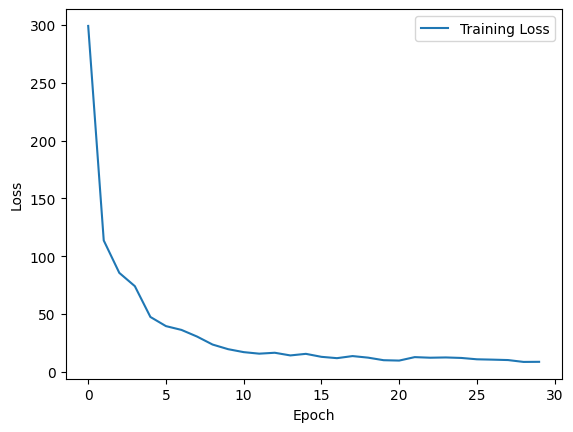

In [159]:
# define model 1 for total cell prediction
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_epochs = 30
batch_size = 32
learning_rate = 0.001
weight_decay=0.01
step_size=5
gamma=0.4 # no learning rate decay
criterion = nn.MSELoss()
# model for task 1
model1 = models.resnet18(pretrained=True)
model1.fc = nn.Linear(model1.fc.in_features,1)
p = 0.8 # dropout probability
model1.dropout = nn.Dropout(p)
model1.to(device)
#train 
train_loader7,dev_loader7,test_loader7=cnn_data_loader('connective',batch_size)
model1_trained=train_covnet18(num_epochs,device,learning_rate,weight_decay,step_size,gamma,model1,train_loader7)



Results for fold 1(train set) total cell number:
<class 'torch.Tensor'> <class 'torch.Tensor'>
RMSE of the model images: 0.97
Pearson correlation coefficient: 1.00
Spearman correlation coefficient: 1.00
R2: 1.00


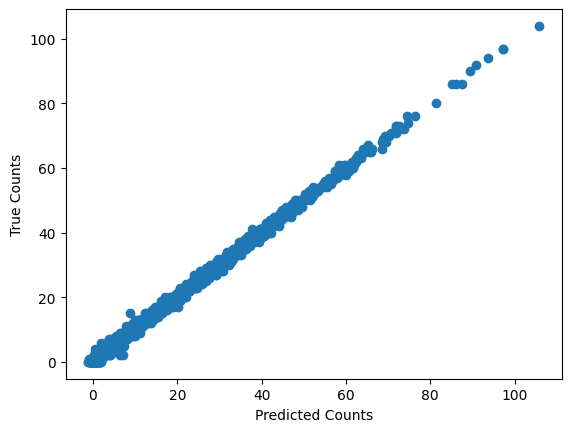

Results for fold 2(dev set) total cell number:
<class 'torch.Tensor'> <class 'torch.Tensor'>
RMSE of the model images: 9.60
Pearson correlation coefficient: 0.81
Spearman correlation coefficient: 0.79
R2: 0.65


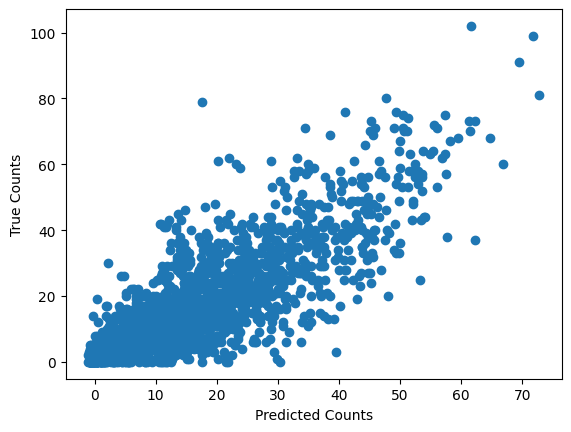

(9.602716058976318, 0.8079124078311566, 0.7923328006915116, 0.6494129967642919)

In [160]:
# fold 1 result
print( 'Results for fold 1(train set) total cell number:')
evaluate_matrix2(model1_trained,train_loader7)
# fold2
print( 'Results for fold 2(dev set) total cell number:')
evaluate_matrix2(model1_trained,dev_loader7)

<class 'torch.Tensor'> <class 'torch.Tensor'>
Results for fold 3(test test) total cell number:
<class 'torch.Tensor'> <class 'torch.Tensor'>
RMSE of the model images: 10.42
Pearson correlation coefficient: 0.82
Spearman correlation coefficient: 0.81
R2: 0.67


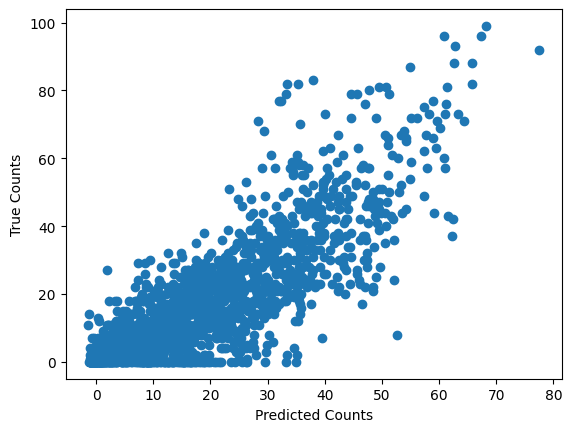

In [161]:
# fold 3
# recorded label and predict only for fold 3
y7_label_18,y7_pred_18=test_evaluate(model1_trained,test_loader7)
print( 'Results for fold 3(test test) total cell number:')
rmse7_18, pearson7_18, spearman7_18, r27_18=evaluate_matrix2(model1_trained,test_loader7)

the over fit for T6 is obvious. so I decreased the batch size, increased drop rate to 0.8 and increased the weight decay to 0.01.  but the loss can not drop, so I improved gamma for higher learning decay.  At the end the R2 for dev set was 0.63 . it is hard to imporve . So I stopped here and test set was 0.7

# Part 4 all out puts

### Out puts for total cell

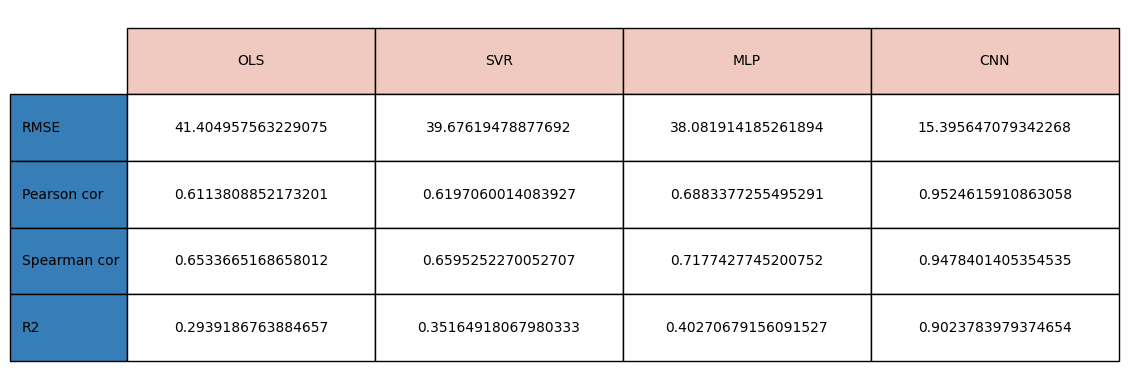

In [166]:
data = [[rmse_ols,rmse_svr,rmse_mlp,rmse_18_1], 
        [pearson_ols,pearson_svr,pearson_mlp,pearson_18_1], 
        [spearman_ols,spearman_svr,spearman_mlp,spearman_18_1], 
        [r2_ols,r2_svr,r2_mlp,r2_18_1]]

rows = ['RMSE', 'Pearson cor', 'Spearman cor', 'R2']
rowColours=["#377eb8","#377eb8","#377eb8","#377eb8"]

columns = ['OLS', 'SVR','MLP','CNN']
colColours=["#F0C9C0","#F0C9C0","#F0C9C0","#F0C9C0"]
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
result_table = ax.table(cellText=data,rowLabels=rows,colLabels=columns, colColours=colColours,
      rowColours=rowColours,cellLoc = 'center',
                      loc='center')

result_table.scale(2,4)
plt.show()

#### Discussion
The best model is CNN model which has the 
highest R2:0.90 abd lowest RMSE : 15.39
Traditional model's performance is fine as they only used 14 given features.With more training and parametr adjustment MLP and SVR's performance could increase.
In the future we should think about data preprocess, to improve performance of traditional regression models.
CNN model used here is resnet18 & resnet 50 came from pytorch models. This is good at image recognition and classification. resnet 18 is CNN with 18 layers deep and in this task, we used the  pre-trained model. It includes covlution layer and pooling layers. resnet 50 is a more complex model with deeper layer. I used that for cells with bad perfomrance score.


### Out puts for all cell type

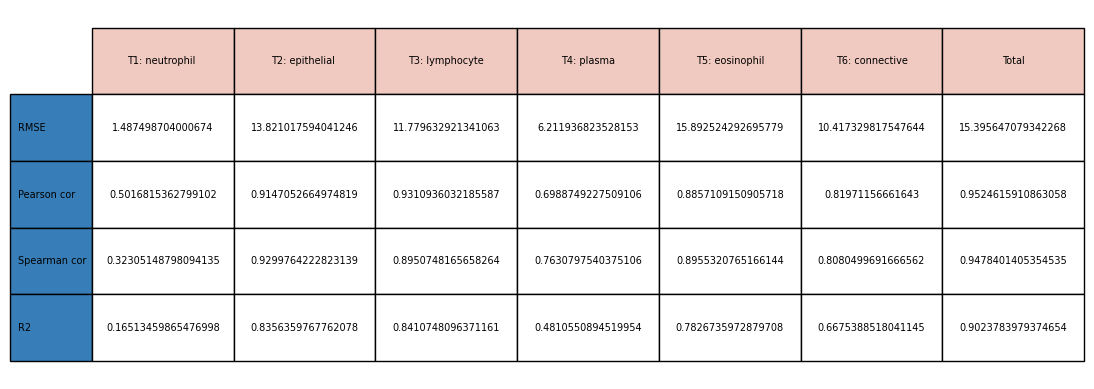

In [169]:


data = [[rmse2_18,rmse3_18,rmse4_18,rmse5_18,rmse6_18,rmse7_18,rmse_18_1], 
        [pearson2_18,pearson3_18,pearson4_18,pearson5_18,pearson6_18,pearson7_18,pearson_18_1], 
        [spearman2_18,spearman3_18,spearman4_18,spearman5_18,spearman6_18,spearman7_18,spearman_18_1], 
        [r22_18,r23_18,r24_18,r25_18,r26_18,r27_18,r2_18_1]]

rows = ['RMSE', 'Pearson cor', 'Spearman cor', 'R2']
rowColours=["#377eb8","#377eb8","#377eb8","#377eb8"]

columns = ['T1: neutrophil ', 'T2: epithelial ','T3: lymphocyte', 'T4: plasma','T5: eosinophil','T6: connective' ,'Total']
colColours=["#F0C9C0","#F0C9C0","#F0C9C0","#F0C9C0","#F0C9C0","#F0C9C0","#F0C9C0"]
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
result_table = ax.table(cellText=data,rowLabels=rows,colLabels=columns, colColours=colColours,
      rowColours=rowColours,cellLoc = 'center',
                      loc='center')

result_table.scale(2,4)
plt.show()



Generally, the perfomrance is good after adjusting parameters. It takes huge amount of time. There are many possible adjustments. And CNN requires large memory and GPu, I purchased colab to run the code and  I don't have time and money to train more parameters. 
All models' train predict is very high which means the model is over fitted. There are many ways to reduced the over fitting and improve the performance on new test sets, such as regularization ; drop rate change the structure and batch size.
I mainly adjusted:
Epoch：High epoch can cause overfit , low epoch might cause underfit because the training is not enough. 
Learning rate: High learning rate learn fast and low learnin rate is slower but more accurate. Decay leairng rate was chosen in most of the training process.

Batch size: High batch size process quicker, low batch size process slower and more accurate. 
Weight decay:
L2 regularization punish the large  weight factors and encourage using small sparse factors，It can  improve the generalization ability. 

In most cases, when I reduce the overfitting, the performance on dev set also decreases, so I choose not to punish to much on over fitting and picked a parameter set with highest dev set performance then got the final performance matrix on test set. At the end the only bad perfomrance is T1 neutrophil. I tried many combinations of paramter but still failed to improve the r2 score.( I improved the r2 from negative to0.2 but can not further improve)